## Instalar librerias necesarias

In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 103.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [2]:
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

## Importamos librerias

In [3]:
import palmerpenguins
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import empiricaldist
import scipy.stats


## Estableciendo apariencia general de gráficos

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguins

### Datos crudos

In [5]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


### Datos previamente procesados

In [6]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de seaborn

In [7]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de Deepnote

In [8]:
pd.read_csv('penguins.csv')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Colecta y validación de datos

### ¿Qué tipo de datos son las variables del conjunto de datos?

In [9]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [10]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [11]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

Dimensiones

In [12]:
preprocess_penguins_df.shape

(344, 8)

### ¿Existan valores nulos explícitos en el conjunto de datos?

In [13]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [15]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

### ¿Cuál es la proporción de valores nulos por cada variable?

In [16]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
)

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


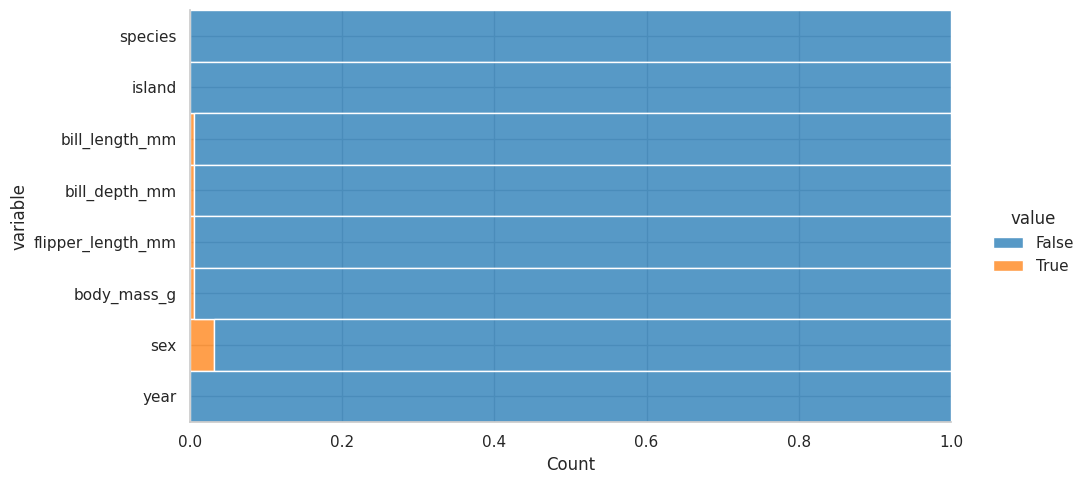

In [17]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y="variable",
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cómo podemos visualizar los valore nulos en todo el conjunto de datos?

In [18]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
)

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

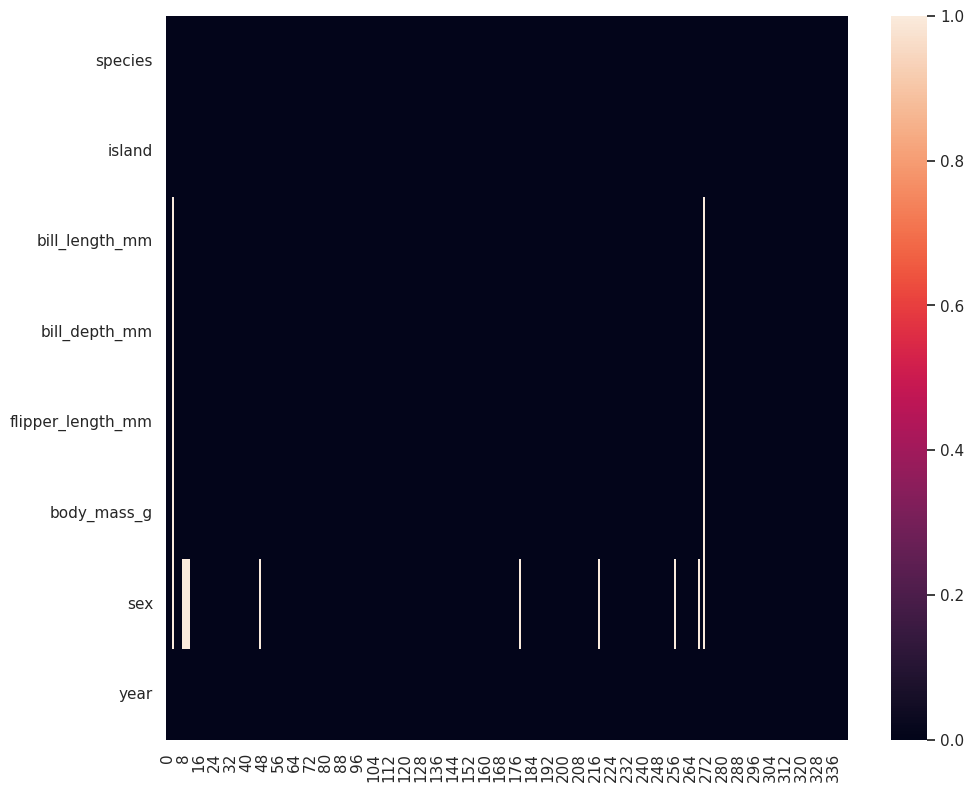

In [19]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data = df
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos los datos?

In [20]:
(
    preprocess_penguins_df
    .dropna()
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [21]:
processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Conteos y Proporciones

### Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [22]:
processed_penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [23]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [24]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [25]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [26]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [27]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

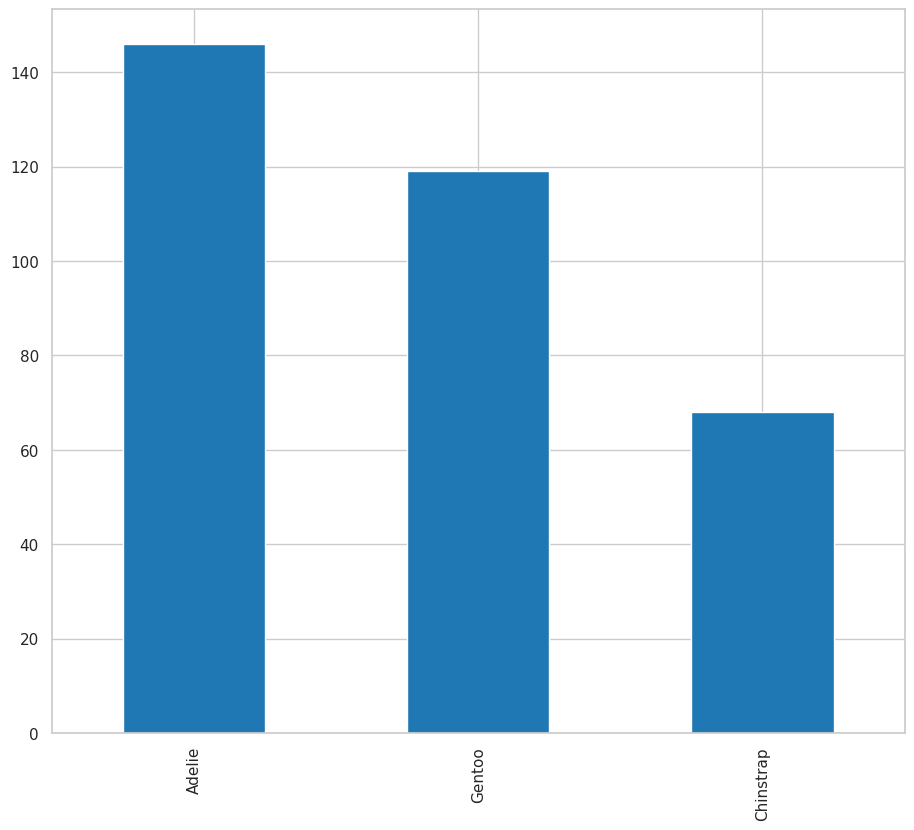

In [28]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

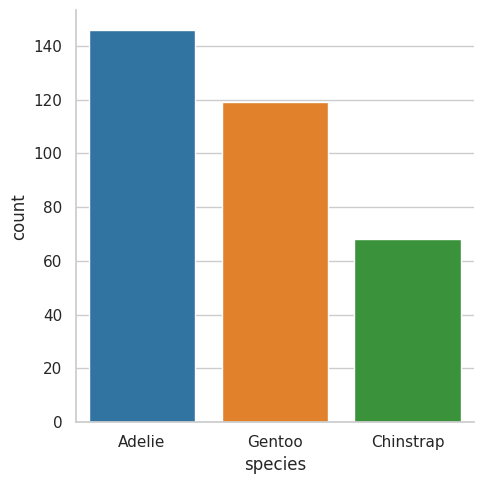

In [29]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count'
)

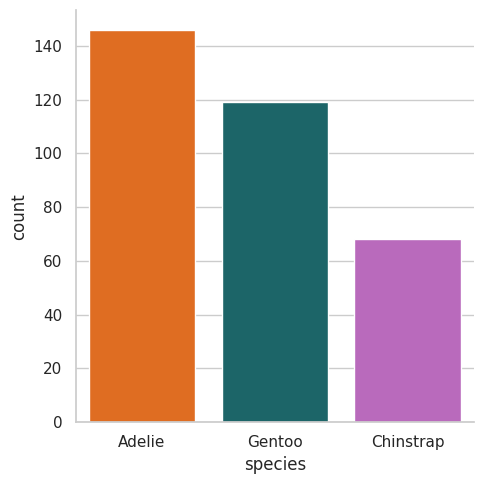

In [30]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

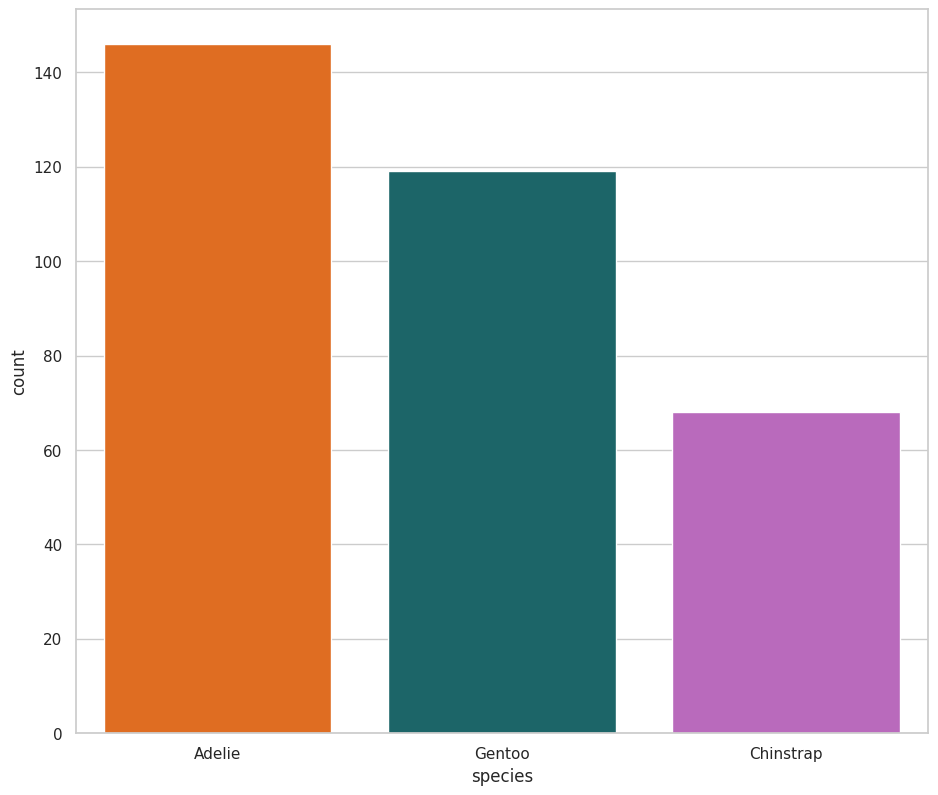

In [31]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
           sns.barplot(
               data=df,
               x= 'species',
               y='count',
               palette=penguin_color
           ) 
        )
    )
)

### ¿Cómo visualizar proporciones?

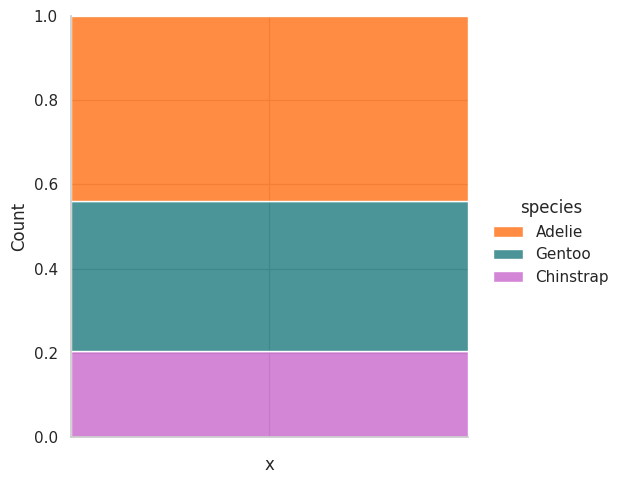

In [32]:
(
    processed_penguins_df
    .assign(x='')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

# Medidas de tendencia central

### Media o promedio

In [33]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [34]:
#Mediante pandas
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [35]:
processed_penguins_df.mean()

/tmp/ipykernel_117/1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

### Mediana

In [36]:
processed_penguins_df.median()

/tmp/ipykernel_117/3242987746.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

### Moda

In [37]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [38]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# Medidas de dispersión

### ¿Cuál es el valor máximo de las variables?

In [39]:
#Valores máximos de todas las variables tanto numéricas como categóricas

processed_penguins_df.max()

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       male
year                      2009
dtype: object

In [40]:
#Valores máximos solo variables numéricas

processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [41]:
#Valores mínimos solo variables numéricas

processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las varigales?

In [42]:
#Rango de valores = max-min

processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### ¿Cuál es la desviación estándar de las variables?

In [43]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [44]:
#Calculamos la media de los valores

processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [45]:
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

In [46]:
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

### ¿Cuál es el rango intercuartílico?

In [47]:
#media 0.5

processed_penguins_df.quantile(numeric_only=True, q=0.50)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
Name: 0.5, dtype: float64

In [48]:
#cuartil 0.75

processed_penguins_df.quantile(numeric_only=True, q=0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [49]:
#cuartil 0.25

processed_penguins_df.quantile(numeric_only=True, q=0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [50]:
#Rango intercuartílico

processed_penguins_df.quantile(numeric_only=True, q=0.75) - processed_penguins_df.quantile(numeric_only=True, q=0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [51]:
#Visualizamos el rango intercuartil mediante una tabla

(
    processed_penguins_df
    .quantile(numeric_only=True, q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(  #creamos una nueva columna
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


### ¿Cómo puedo visualizar la distribución de una variable?

### histograma

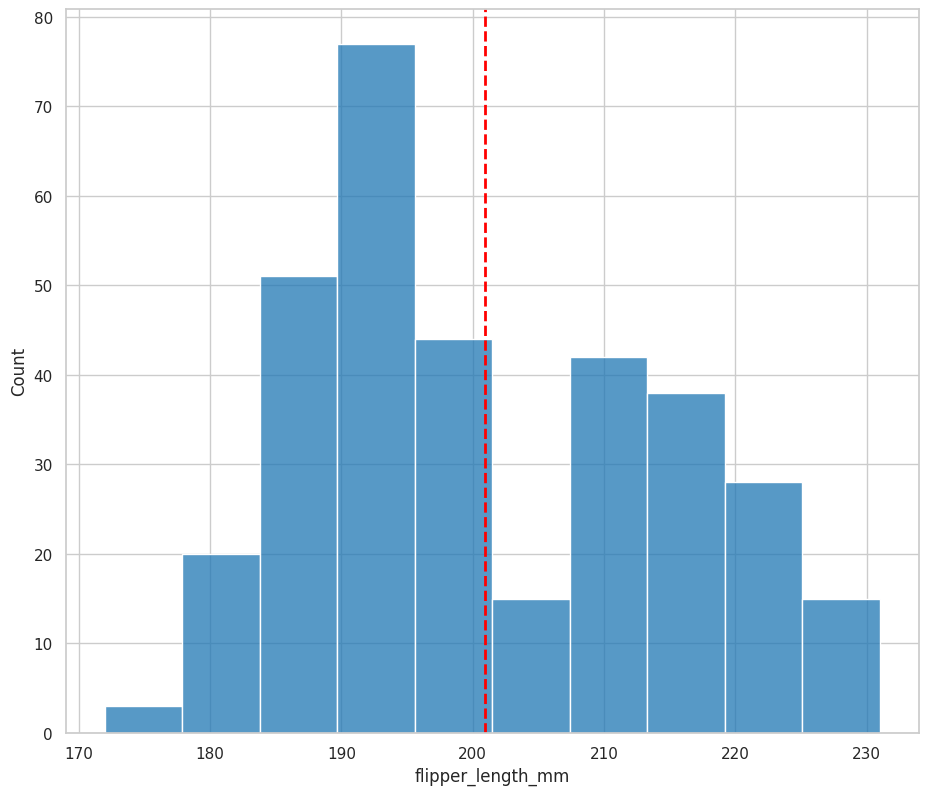

In [52]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm' 
)

#Calculamos media de una variable y visualizamos en una línea roja

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(numeric_only=True),
    color='red',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

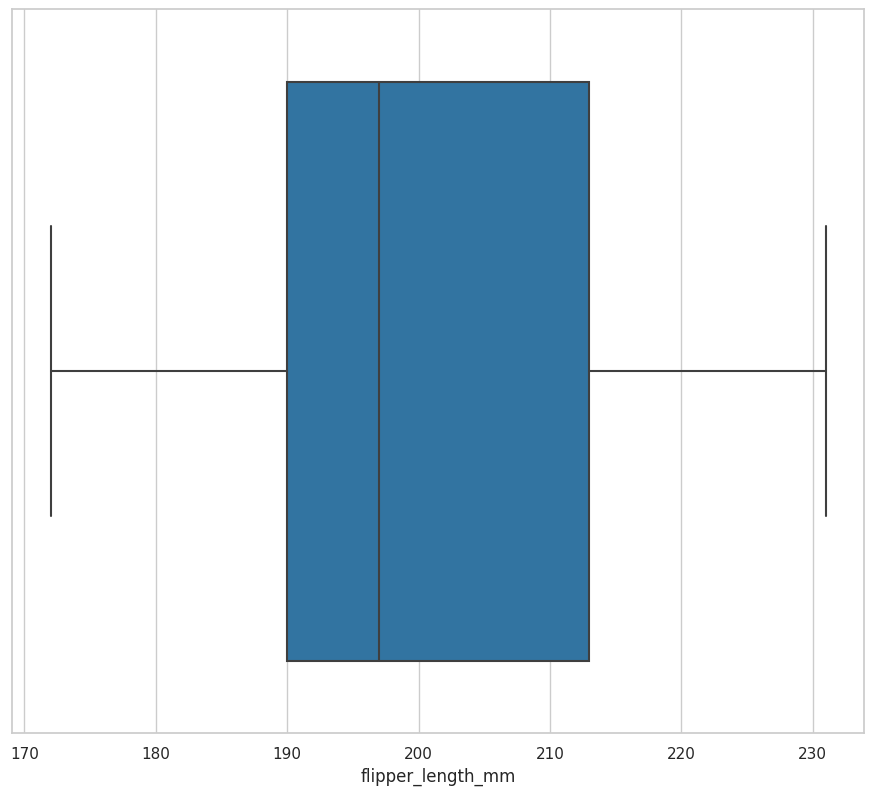

In [53]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

### Limitaciones

In [54]:
def freedman_diaconis_bindwith(x: pd.Series) -> float:
    """Find optimal bindwith using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

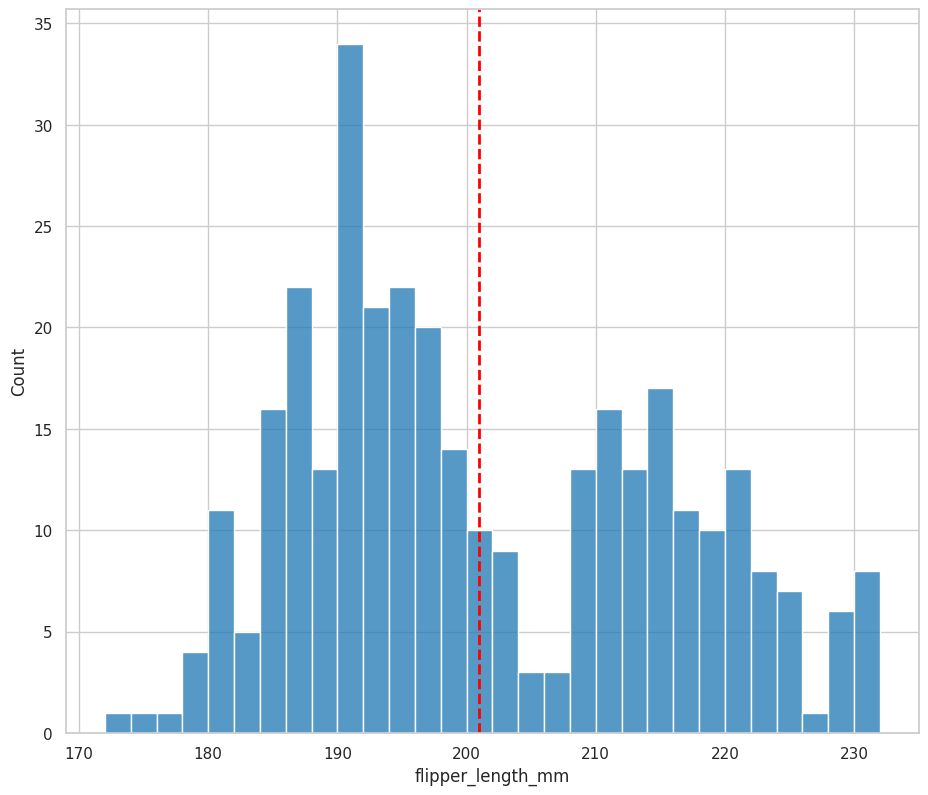

In [55]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

# Distribuciones: PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

### Utilizando seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

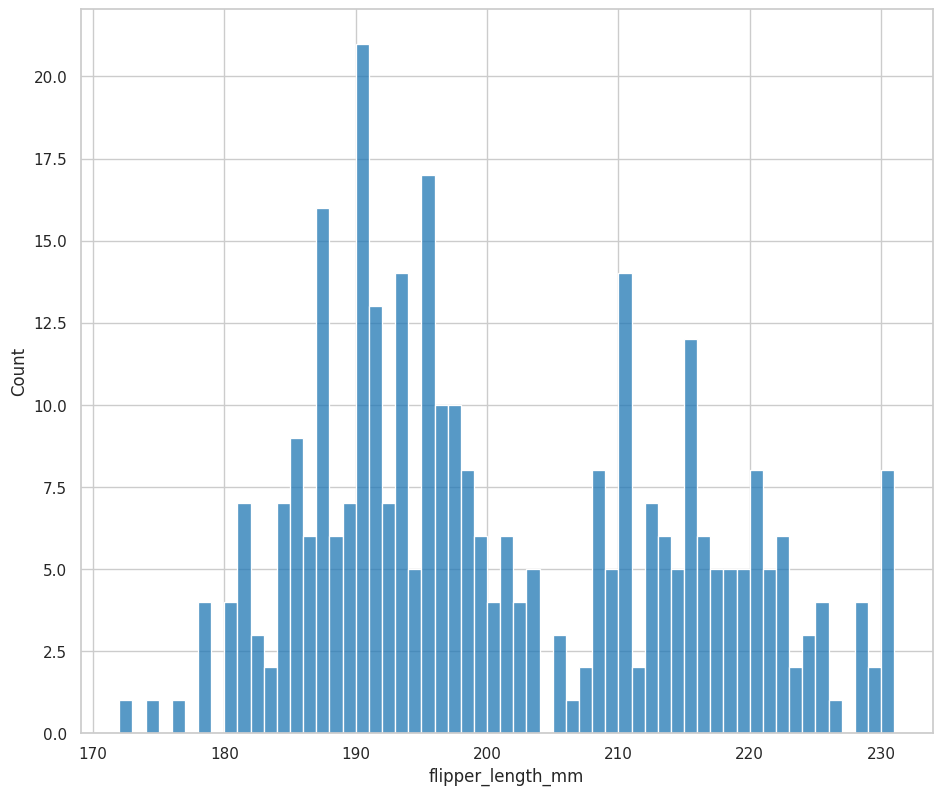

In [56]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

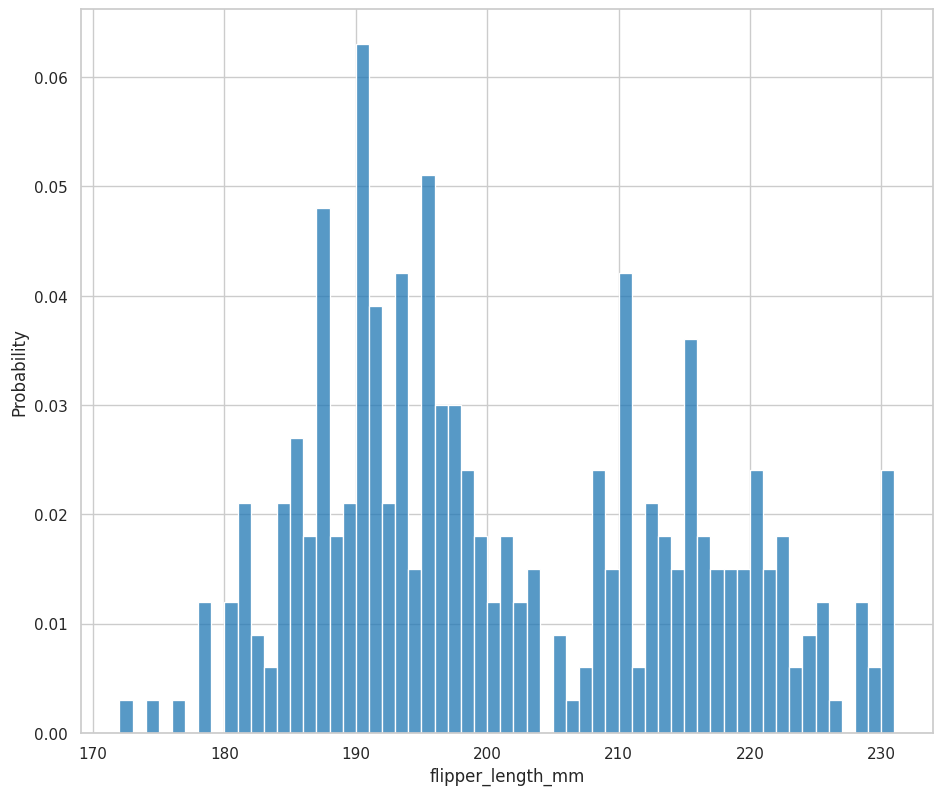

In [57]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando librería empiricaldist

In [58]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

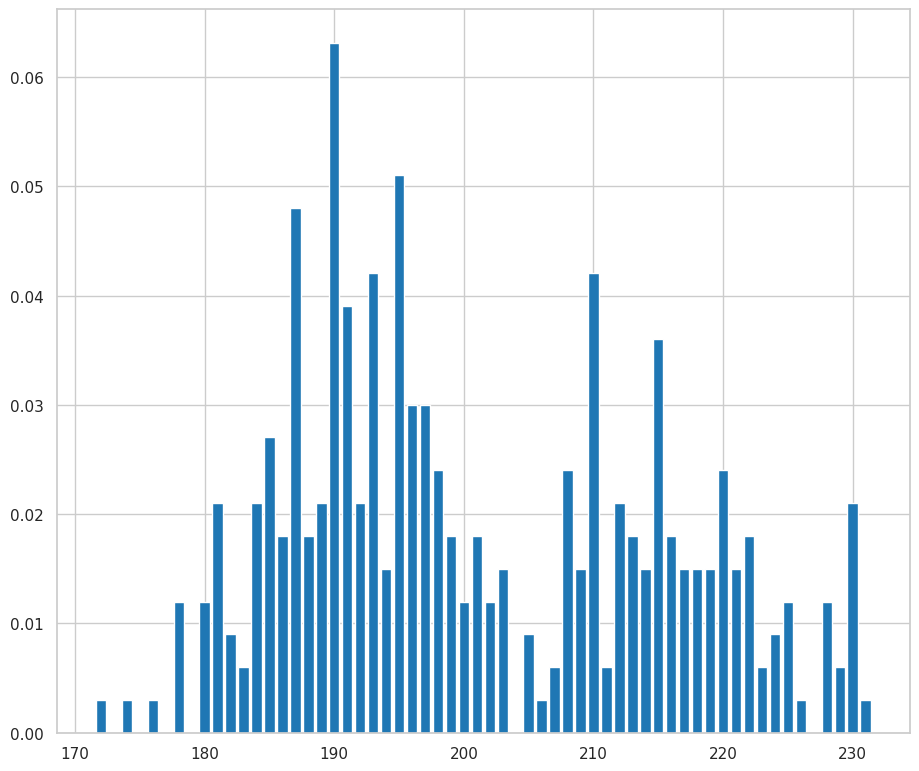

In [59]:
#visualizamos las probabilidades por cada valro discreto que tengamos

pmf_flipper_length_mm.bar()

In [60]:
#Preguntamos que probabilidad tenemos de encontrar un pinguino con característa 190 fflipper lenngth

pmf_flipper_length_mm(190)

0.06306306306306306

In [61]:
#Obtenemos el valor máximo 

processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empíricas de probabilidad acumulada (ECDFs)sns.ecdfplot(

### Utilizando seaborn

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

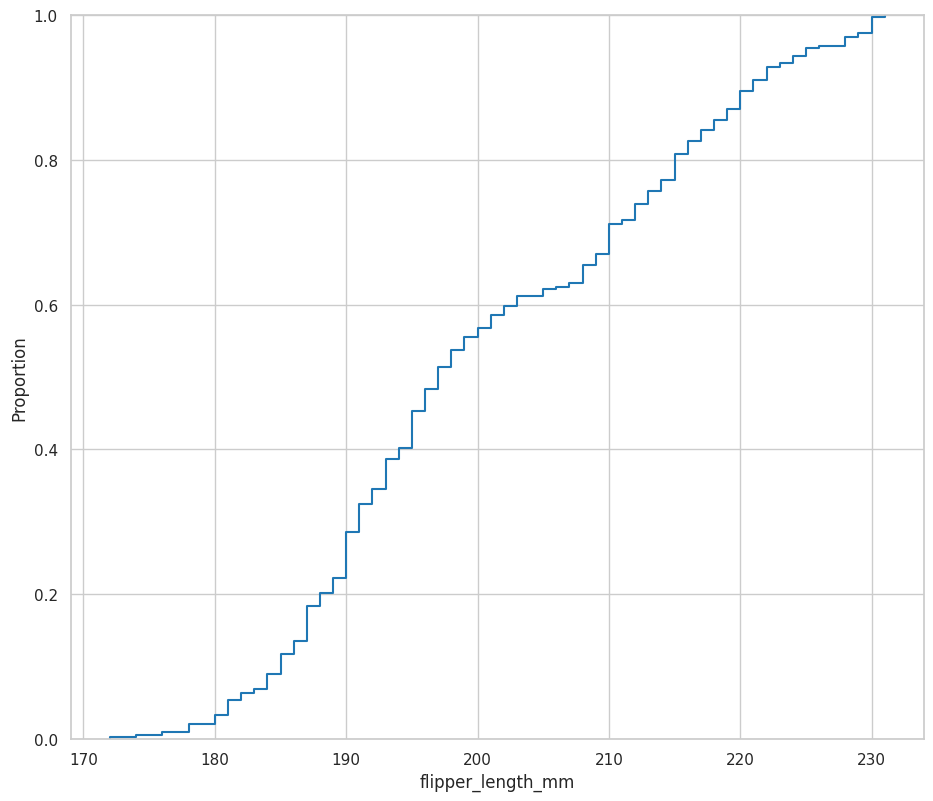

In [62]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

### Utilizando empiricaldist

In [63]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

<AxesSubplot: >

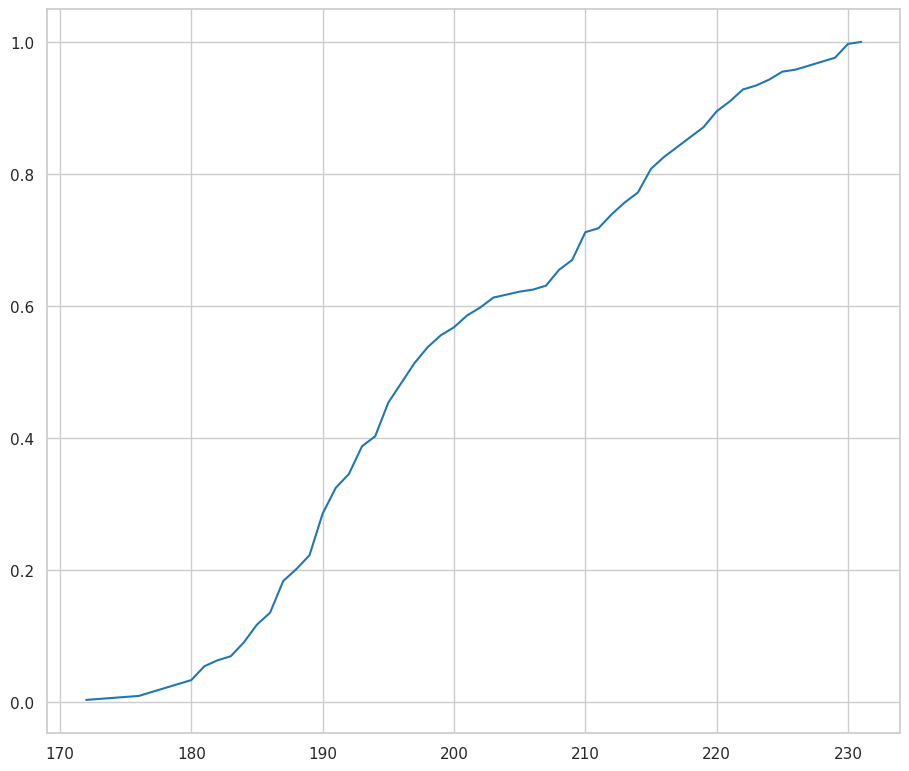

In [64]:
cdf_flipper_length_mm.plot()

200 0.5675675675675675


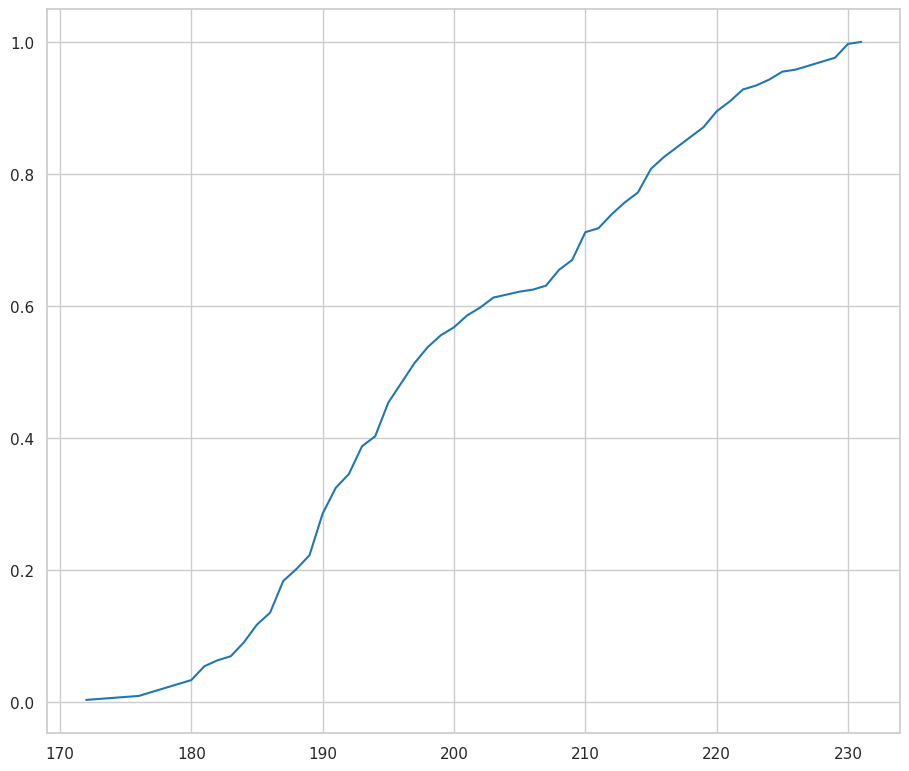

In [65]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

print(q, p)

200 0.5675675675675675


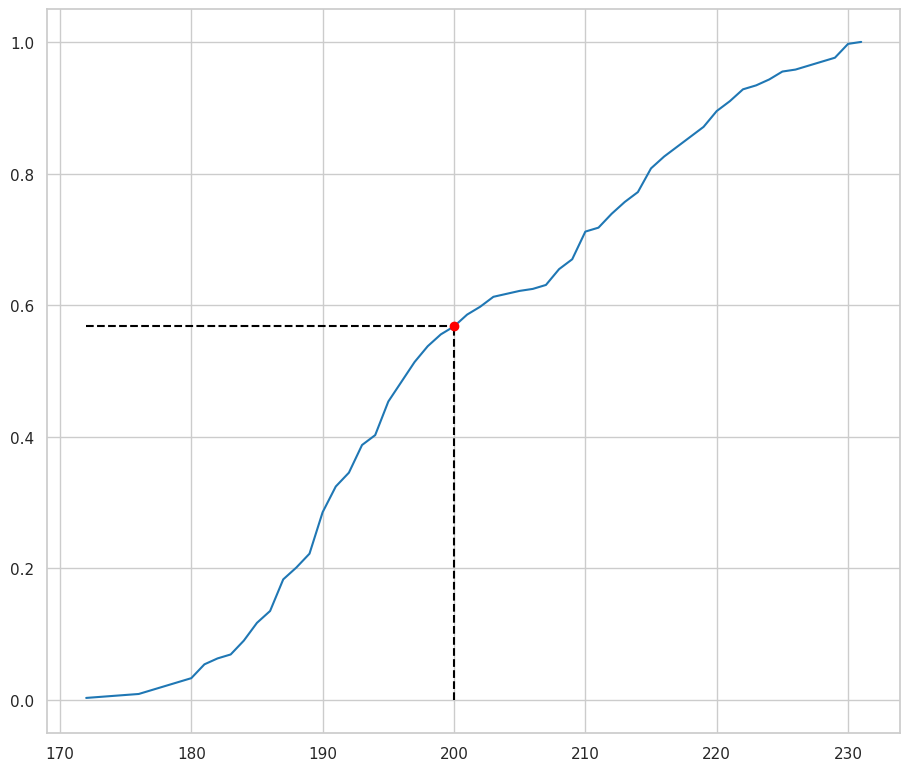

In [66]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

print(q, p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyles='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyles='dashed'
)

plt.plot(q, p, 'ro')

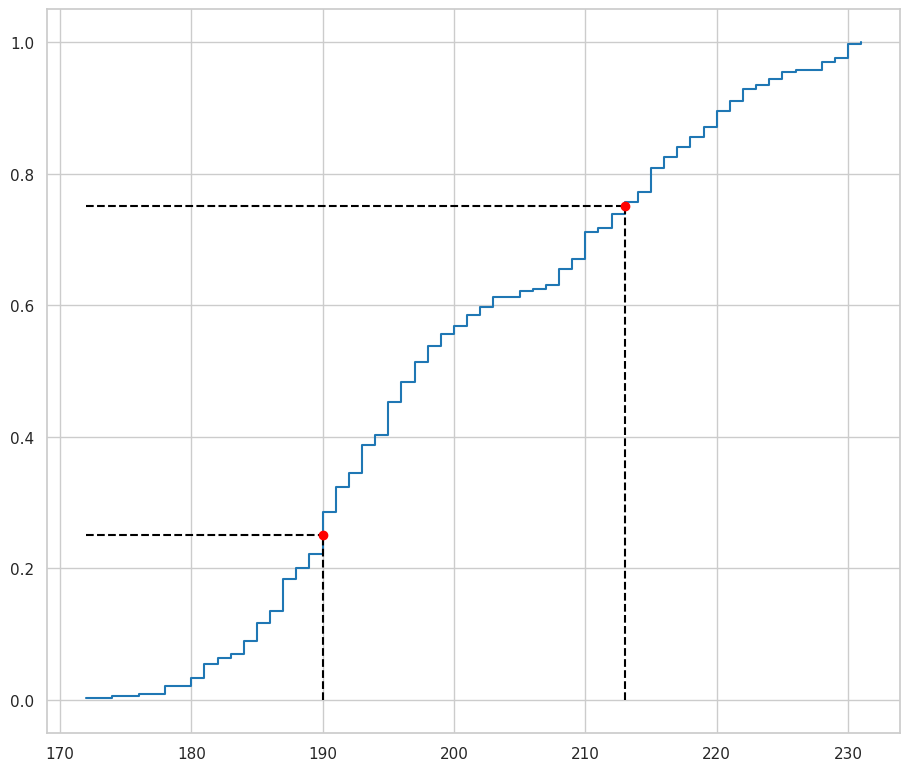

In [67]:
#¿Qué valor obendríamos con una probabilidad dada del 0.25 o 0.75 ?

cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.075

ps = (0.25, 0.75 ) #IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyles='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyles='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

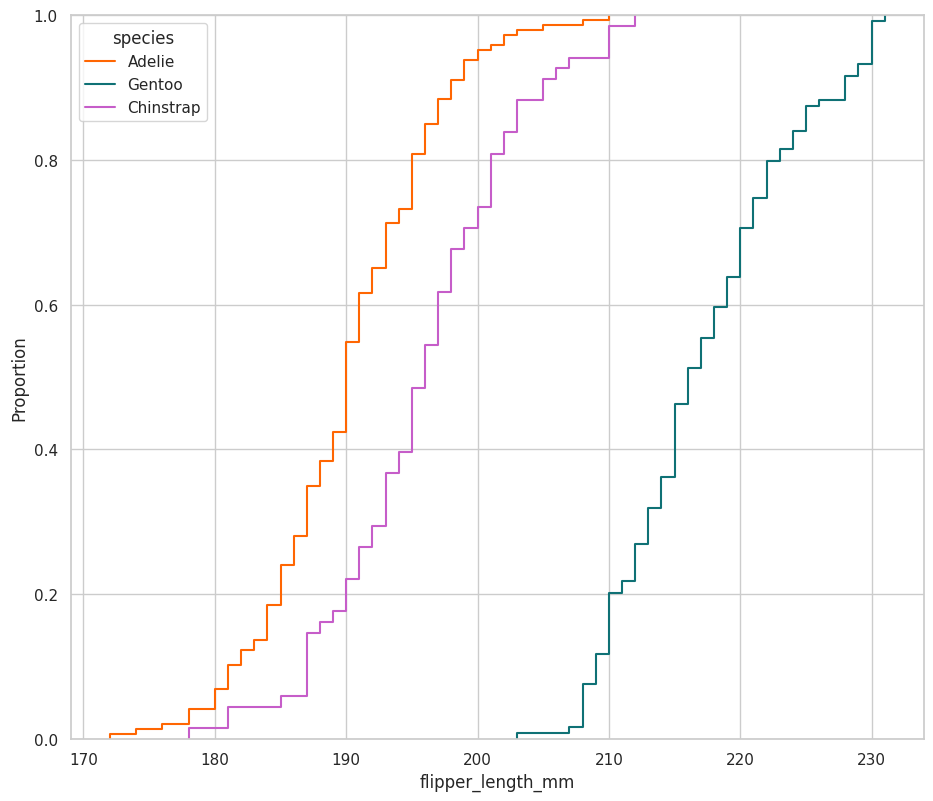

In [68]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Funcionres de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

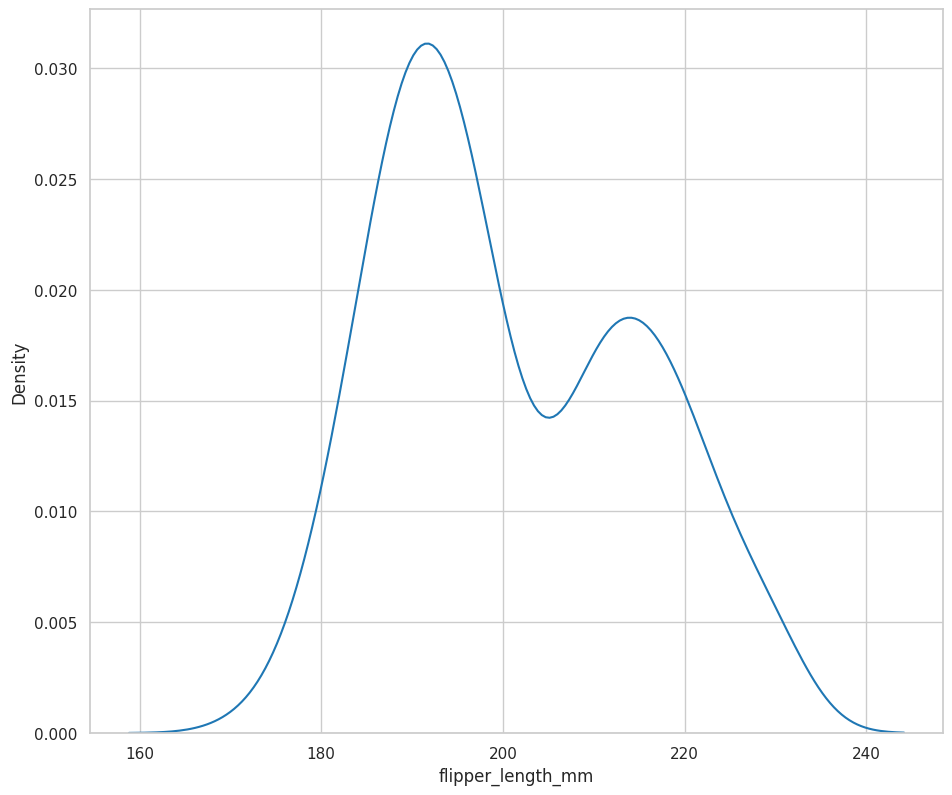

In [69]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

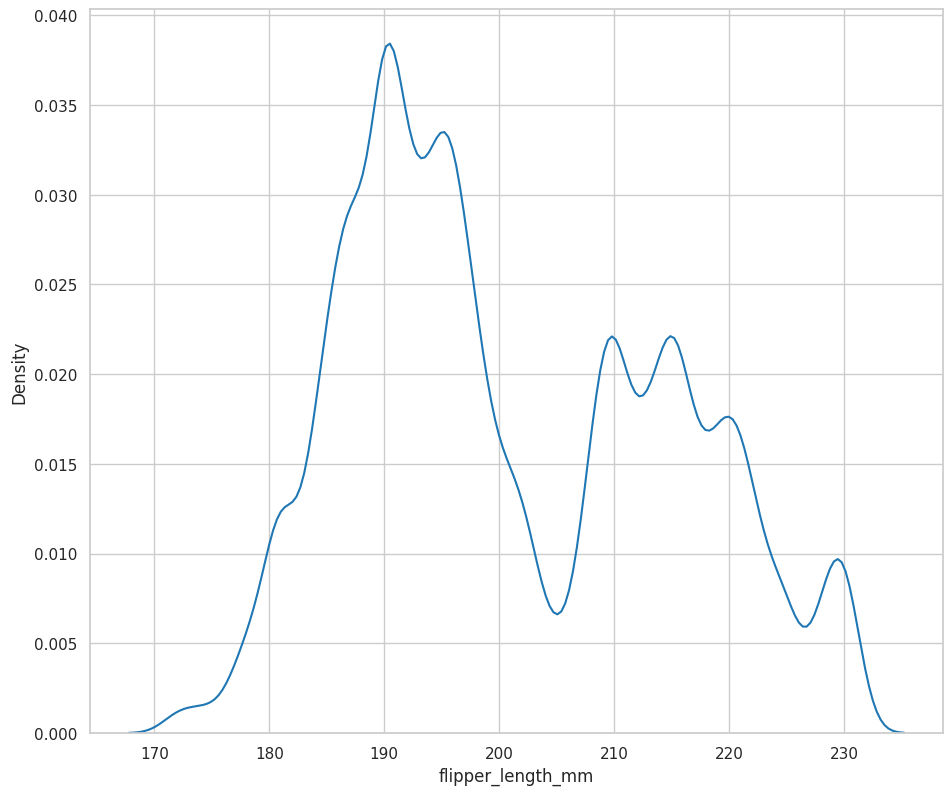

In [70]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1 
)

In [71]:
#Ejemplo de densidad de probabilidad

stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

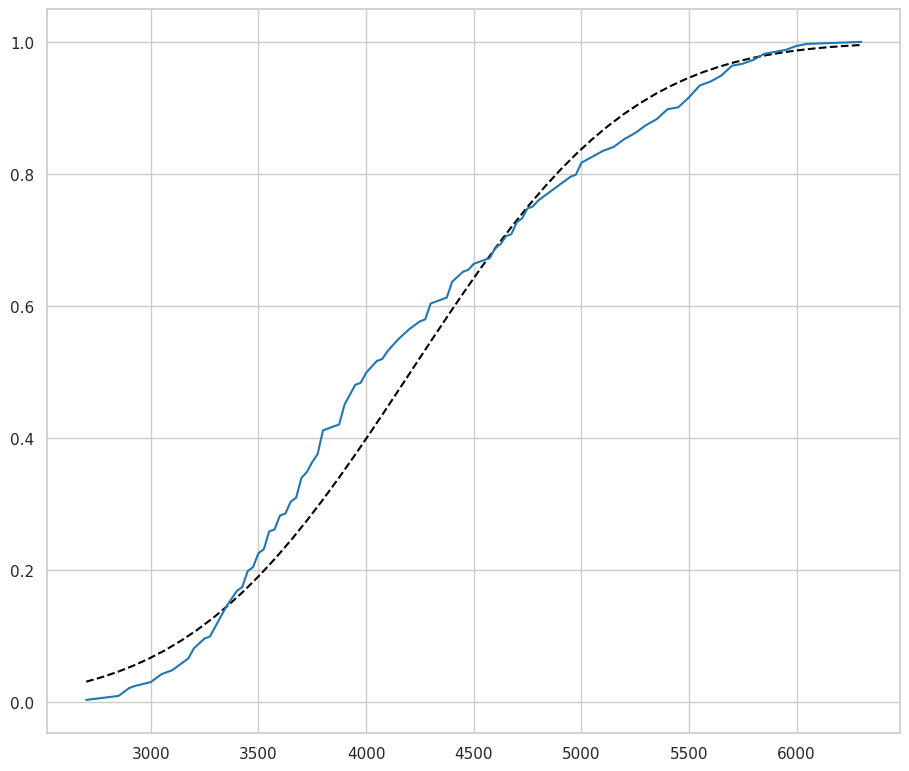

In [72]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) #creamos una distribución normal

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

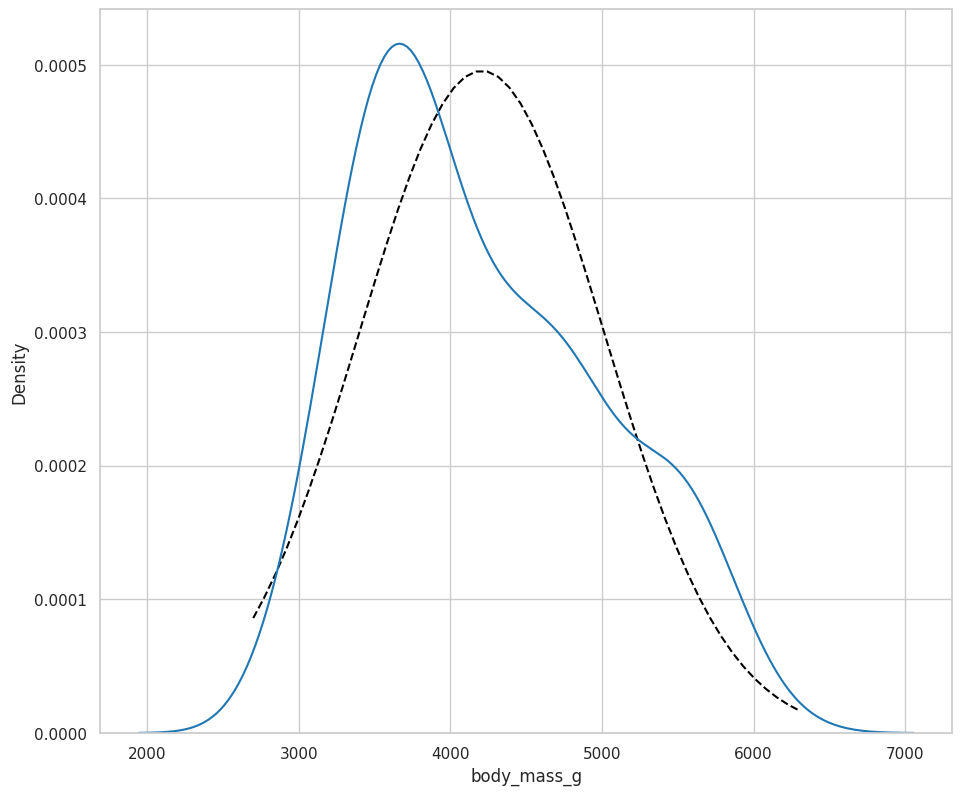

In [73]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) #creamos una distribución normal

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

## Ley de los grandes números y Teorema del Límite Central

### Ley de los Grandes Números

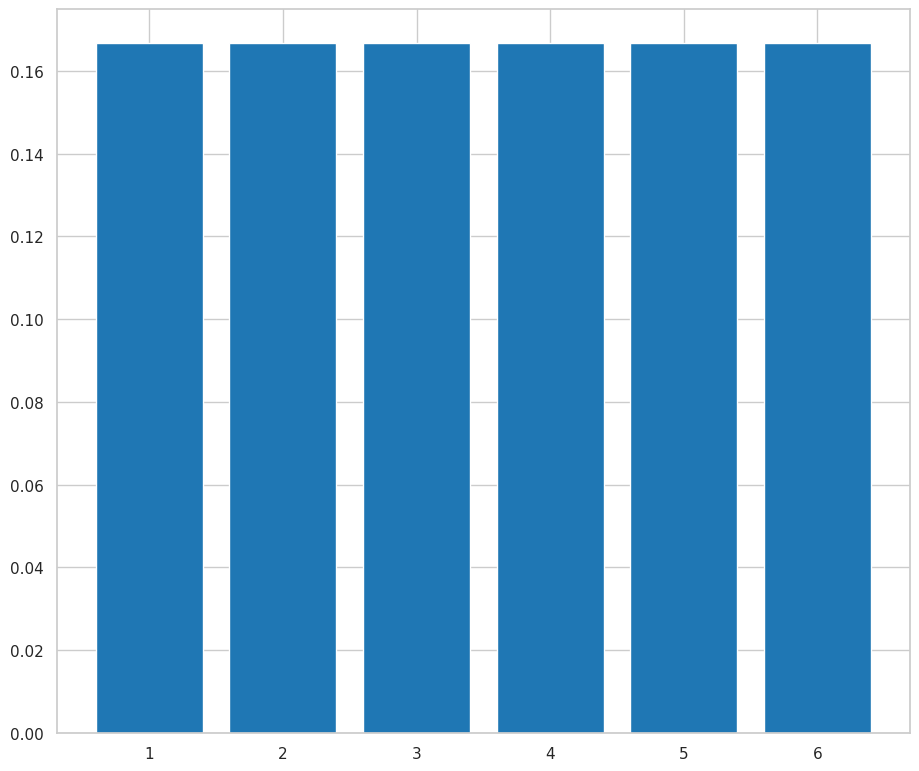

In [74]:
#Generamos infinitos lanzamientos de un dado, entre 1 y 6,
#y calculamos la probabilidad de que caiga para cada número entre 1 y 6

dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

[4. 4. 5. 2. 6. 2. 4. 3. 4. 5. 1. 3. 2. 4. 4. 4. 1. 6. 2. 6. 6. 2. 1. 4.
 4. 3. 5. 3. 1. 3. 5. 1. 6. 2. 2. 6. 1. 2. 4. 4. 3. 3. 3. 4. 3. 2. 5. 5.
 3. 1. 4. 2. 4. 3. 6. 1. 5. 4. 3. 4. 5. 2. 5. 3. 5. 4. 6. 6. 5. 3. 6. 6.
 2. 5. 3. 2. 3. 4. 5. 6. 4. 2. 2. 2. 4. 3. 2. 5. 6. 5. 2. 3. 5. 6. 4. 5.
 6. 5. 3. 3.]
[4. 1. 5. 1. 1. 3. 3. 3. 2. 3. 5. 6. 6. 4. 5. 2. 3. 4. 5. 5. 4. 4. 6. 5.
 3. 1. 4. 5. 6. 1. 6. 2. 6. 3. 3. 3. 3. 6. 1. 2. 1. 1. 3. 4. 4. 3. 3. 6.
 5. 4. 4. 2. 2. 1. 4. 1. 3. 4. 6. 1. 3. 5. 3. 1. 1. 6. 6. 4. 6. 2. 3. 4.
 5. 4. 3. 5. 5. 3. 6. 4. 2. 3. 6. 3. 3. 3. 3. 1. 5. 2. 1. 6. 4. 2. 2. 4.
 4. 1. 4. 5. 1. 4. 6. 4. 2. 2. 1. 3. 2. 4. 3. 1. 5. 3. 6. 4. 1. 1. 6. 1.
 3. 4. 4. 6. 1. 5. 5. 2. 1. 6. 1. 4. 2. 4. 1. 6. 4. 5. 4. 5. 3. 6. 4. 2.
 2. 1. 4. 2. 5. 3. 6. 1. 5. 3. 3. 3. 2. 4. 1. 4. 5. 2. 4. 6. 3. 6. 6. 1.
 2. 3. 3. 6. 5. 3. 2. 1. 6. 4. 2. 4. 3. 5. 6. 5. 4. 2. 1. 3. 2. 3. 5. 1.
 5. 5. 2. 3. 3. 2. 3. 1. 4. 6. 3. 2. 3. 5. 2. 1. 3. 3. 1. 4. 3. 4. 4. 5.
 3. 1. 2. 1. 1. 1. 5. 1. 3. 4. 4. 2. 

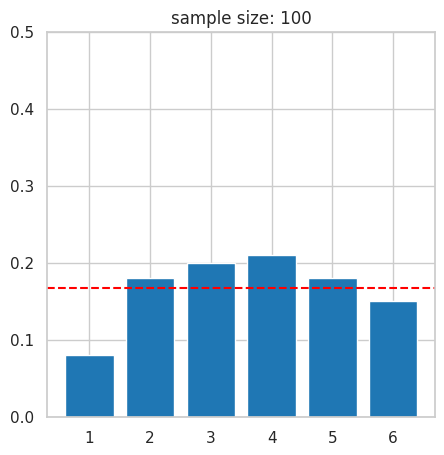

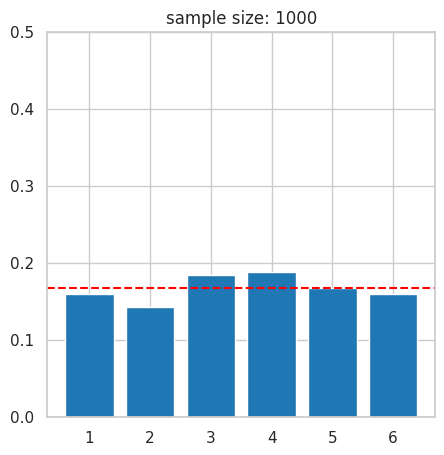

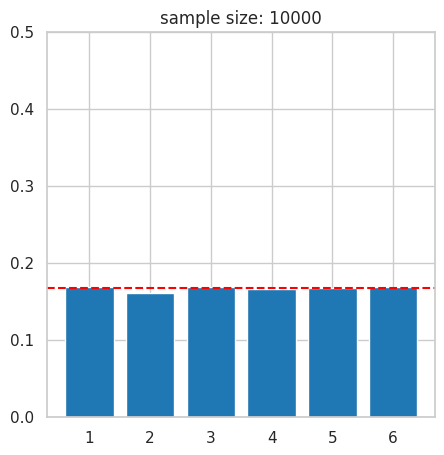

In [75]:
#Generamos 100, luego 1000 y luego 10000 lanzamientos
#de un dado entre 1 y 6 y lo guardamos en arreglo values
#por cada secuencia de lanzamientos calculamos el Pmf probabilidad y graficamos

for sample_size in (1e2,1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    print(values)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"sample size: {sample_size}")

### Teorema del Límite Central

<AxesSubplot: >

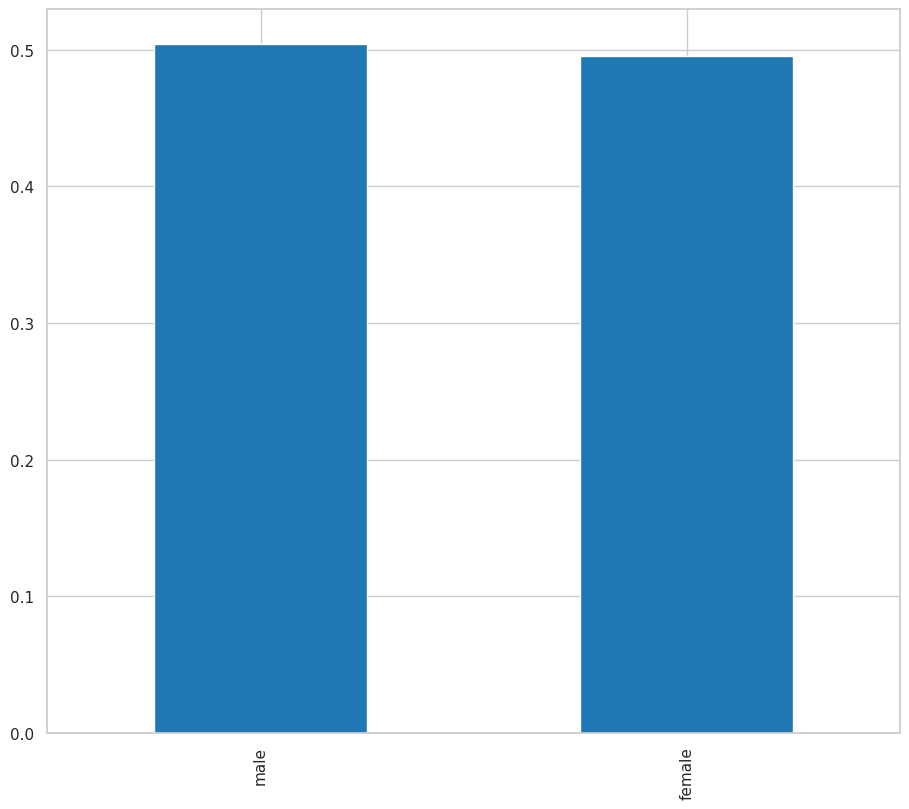

In [76]:
#contamos y Calculamos la proporción (%) de machos y hembras de pinguinos
#y lo graficamos

processed_penguins_df.sex.value_counts(normalize=True).plot(kind='bar')

In [77]:
#Nuevamente contamos y Calculamos la proporción (%) de machos y hembras

processed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [78]:
#transformamos variable categórica sex a variable numérica de 1 y 0

sex_numeric = processed_penguins_df.sex.replace(['male', 'female'], [1, 0])


In [79]:
#Generamos muestras aleatoria 1000, y en cada muestreo 
# vamos a sacar cierta cantidad de pinguinos sample_zize = 35
# luego contamos cuanto es la proporción de machos
# y agregamos en una nueva columna
# luego calculamos el promedio de todas estas muestras que calculamos

number_samples = 1000
sample_size = 35

np.random.seed(42)

samples_list = []
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    samples_list.append(sex_numeric_sample)

samples_df = pd.DataFrame(np.column_stack(samples_list), columns=[f"sample_{i}" for i in range(1, number_samples + 1)])

male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 50.1829%


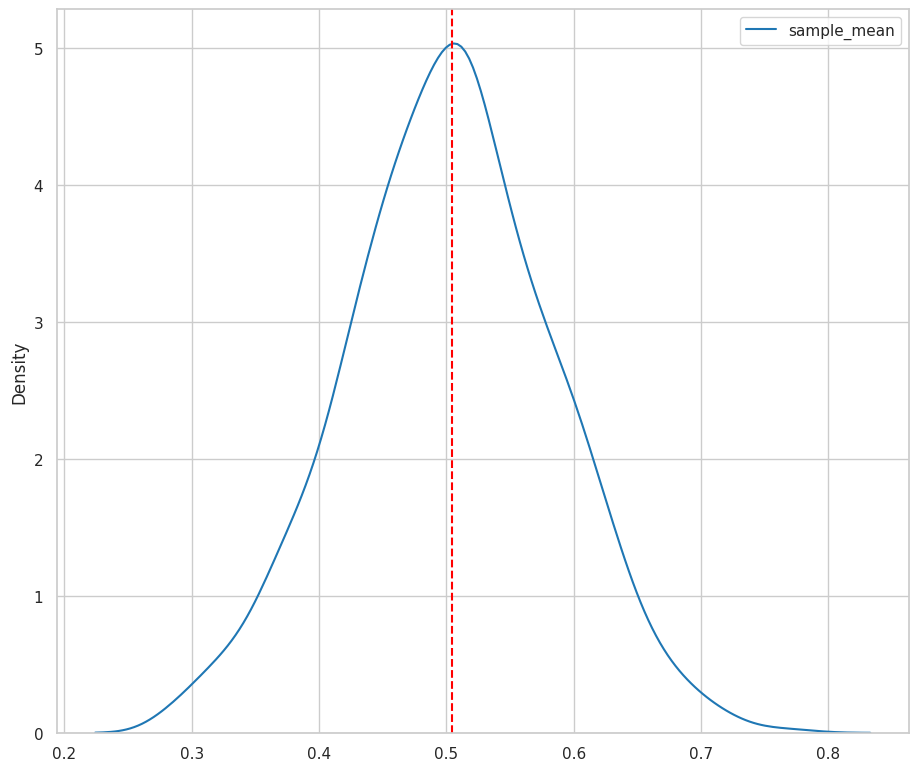

In [80]:
# Vamos a corroborar que al incrementar el número de muestras aleatorias
# nos podemos acercar a la media real de la población
# es decir a la media real de población de machos

# graficamos función de densidad

sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [81]:
# graficamos el efecto de ir incrementando el tamaño de las muestras
# en la estimación de nuestro valor final

sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

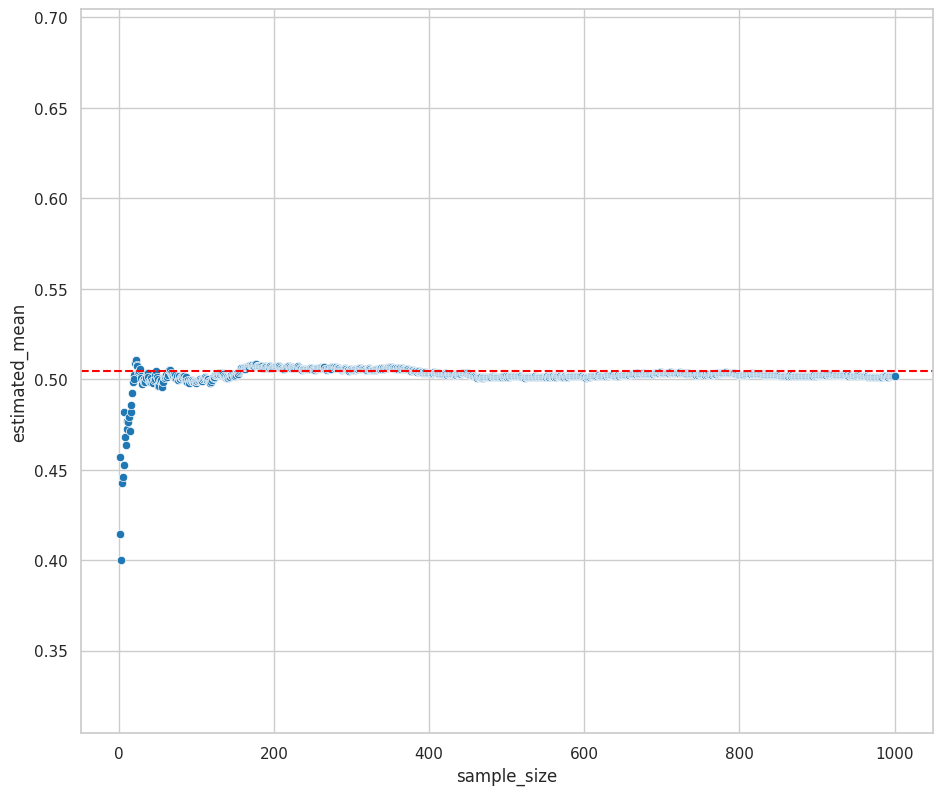

In [82]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

## Estableciendo relaciones: Gráfica de punto

### Relaciones entre variables categóricas

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

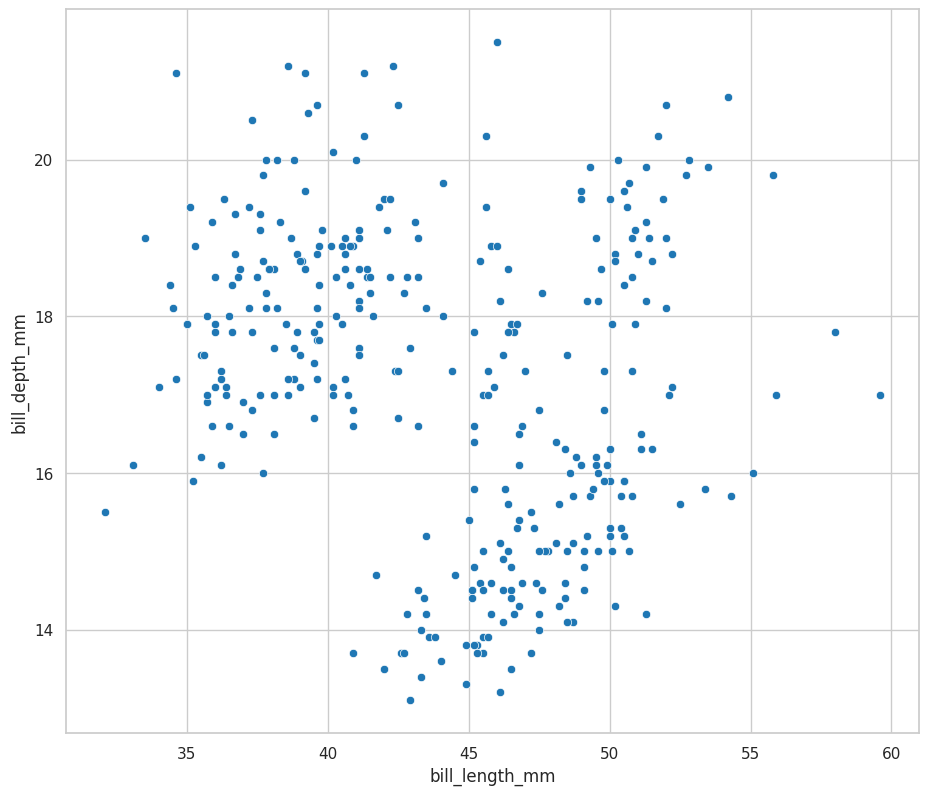

In [83]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

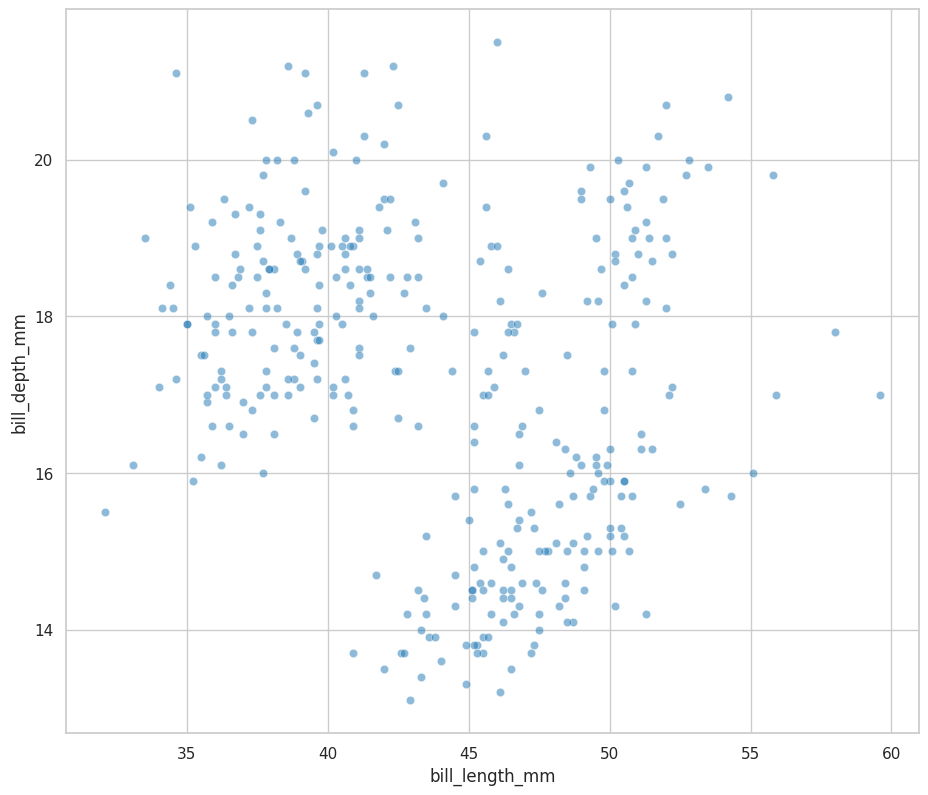

In [84]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

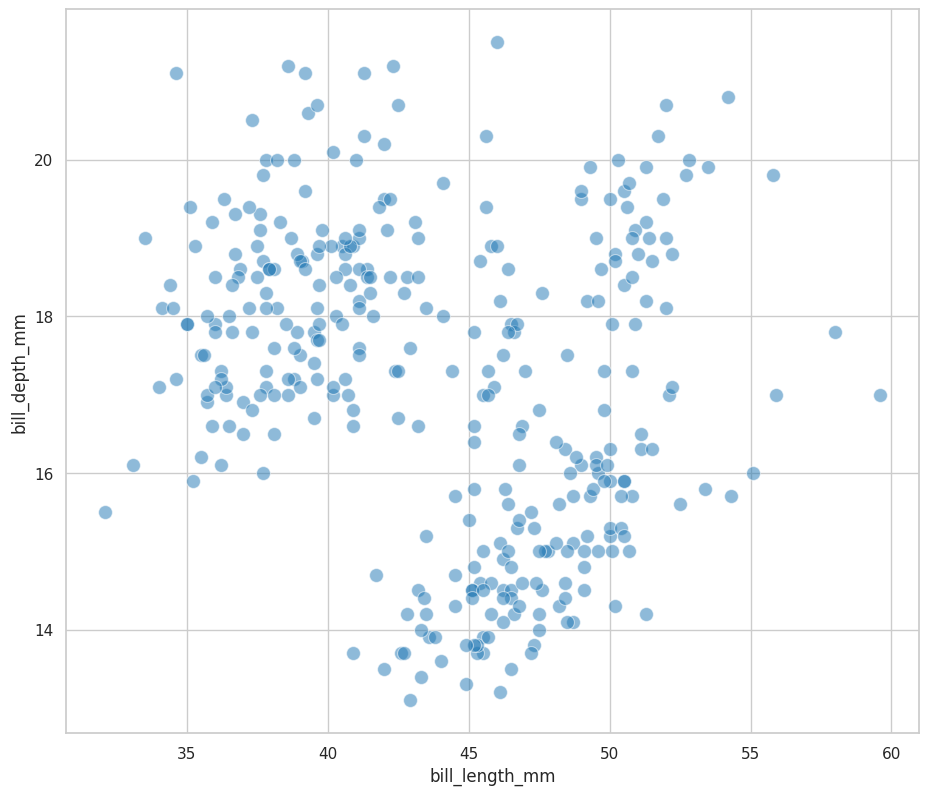

In [85]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

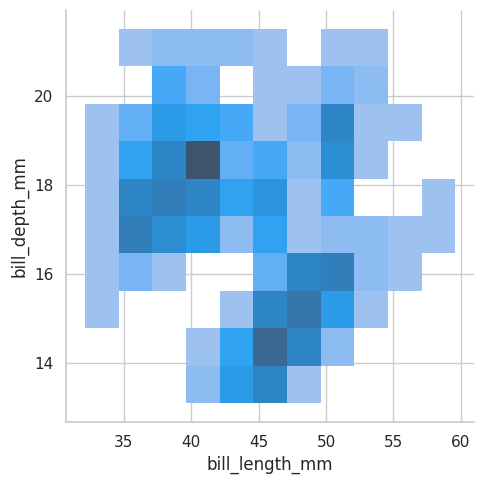

In [86]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

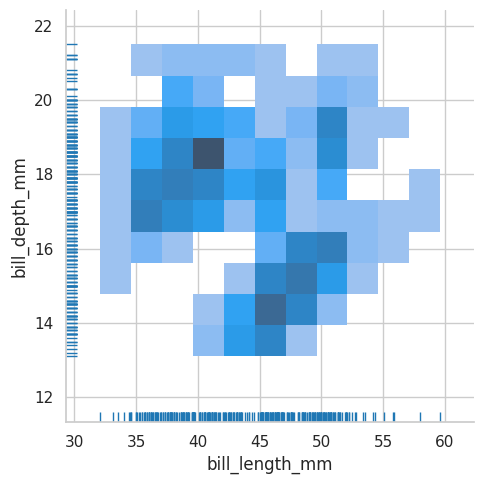

In [87]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

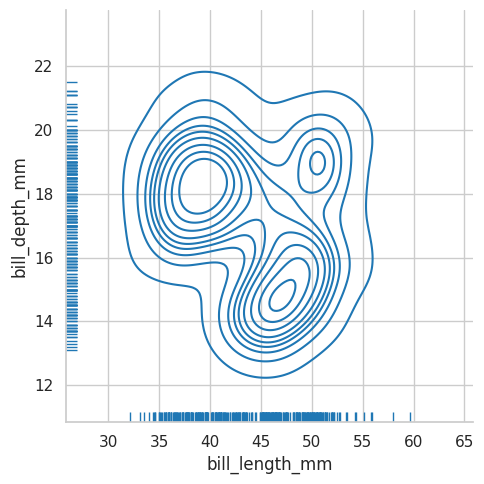

In [88]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

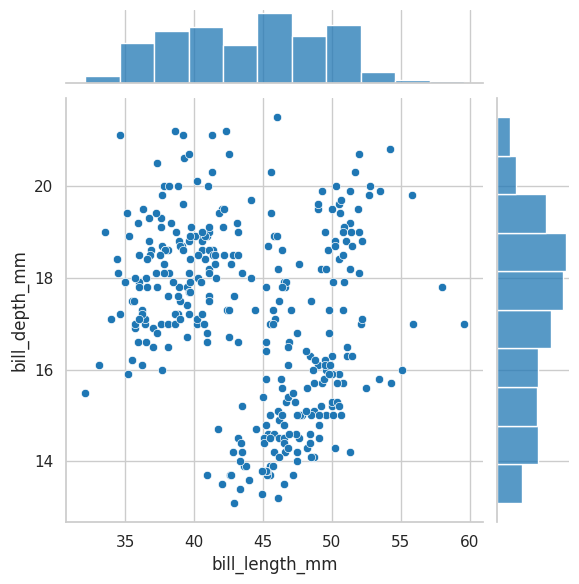

In [89]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

## Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

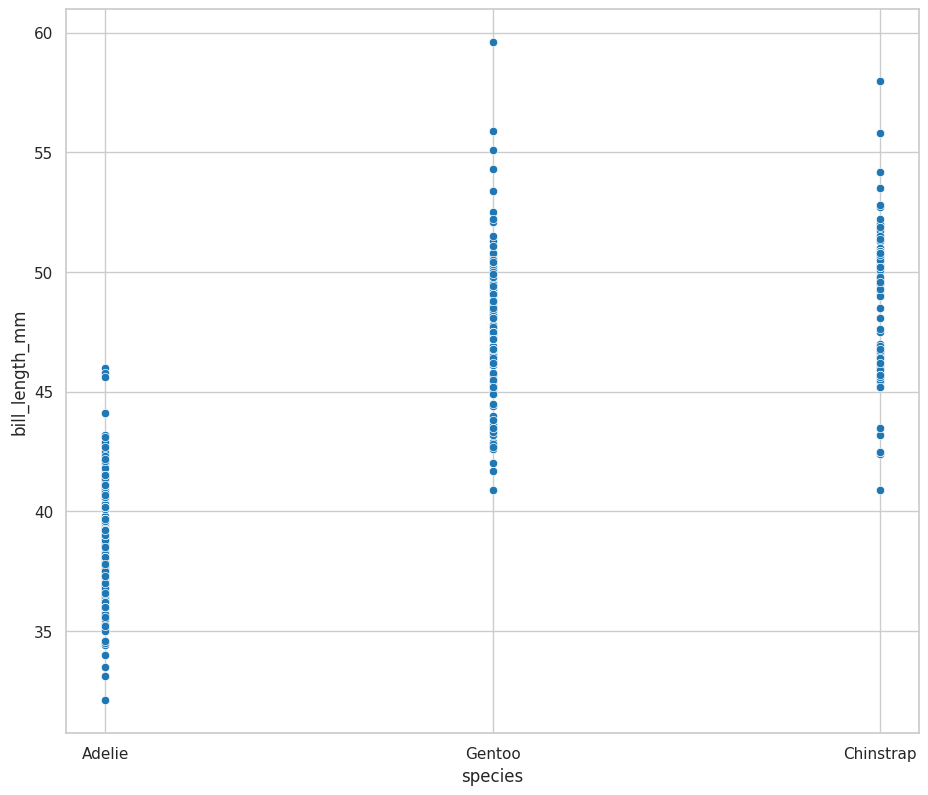

In [90]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='bill_length_mm'
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

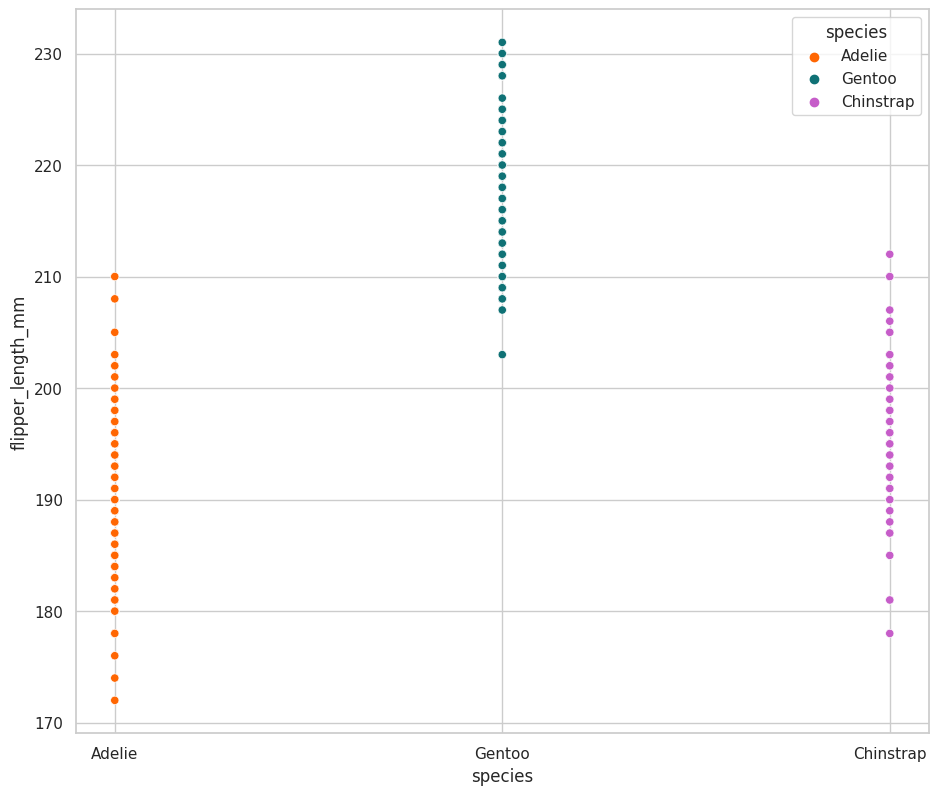

In [91]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

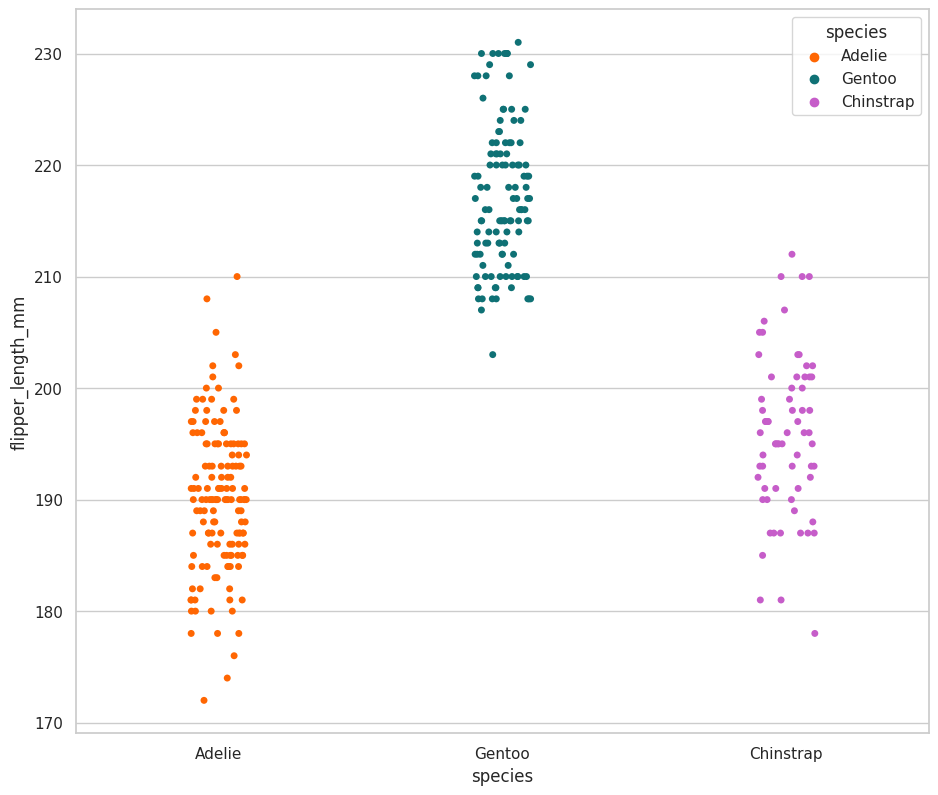

In [92]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='species'>

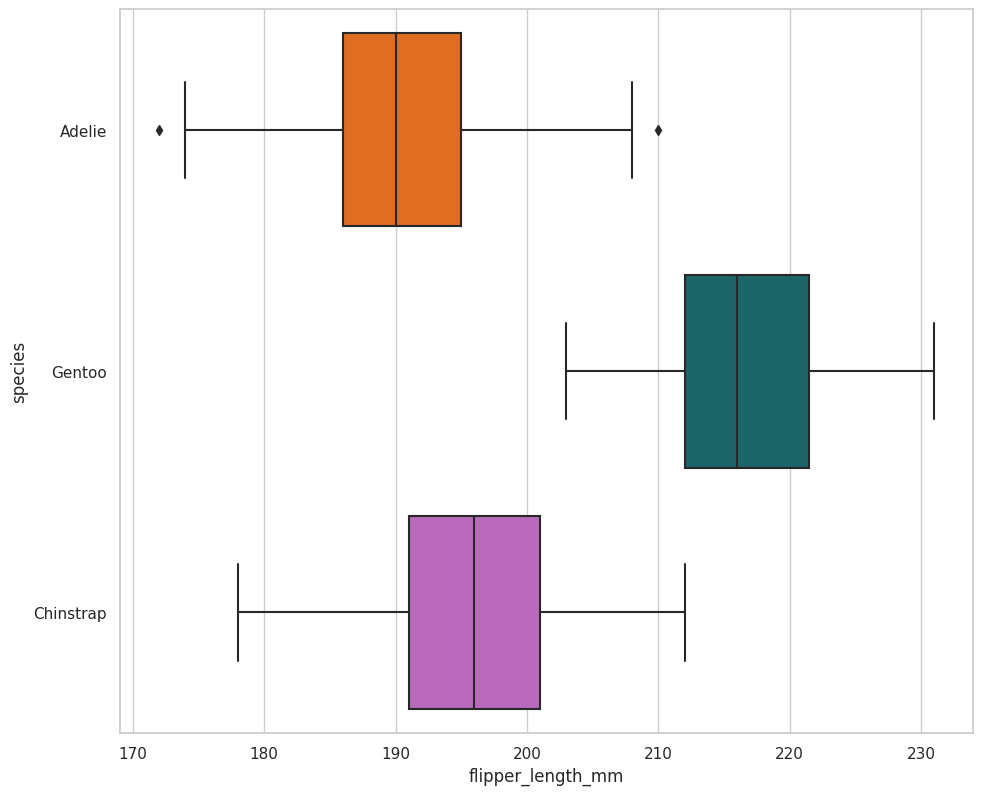

In [93]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

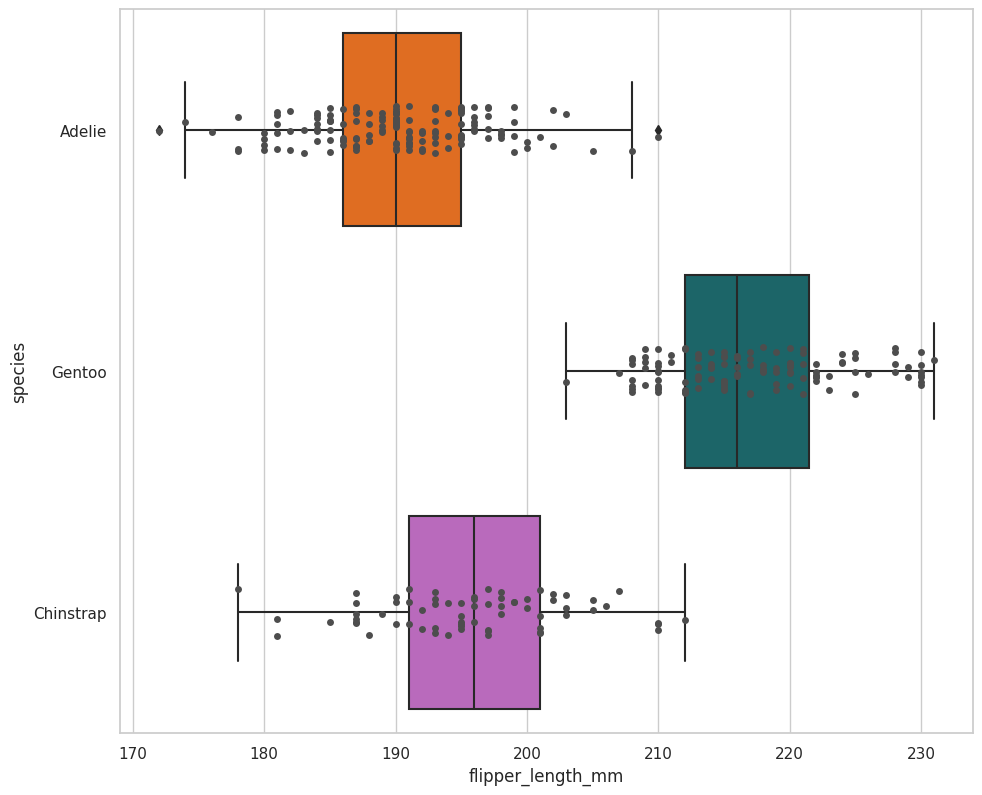

In [94]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='0.3'
)

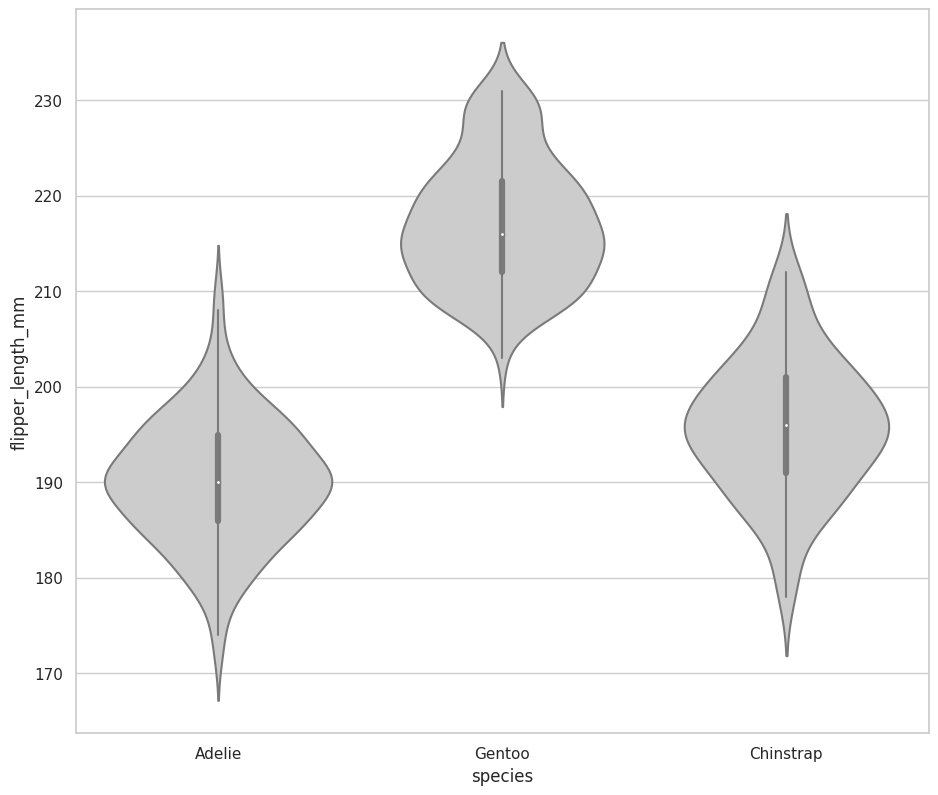

In [95]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='0.8'
)

/tmp/ipykernel_117/1053842207.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


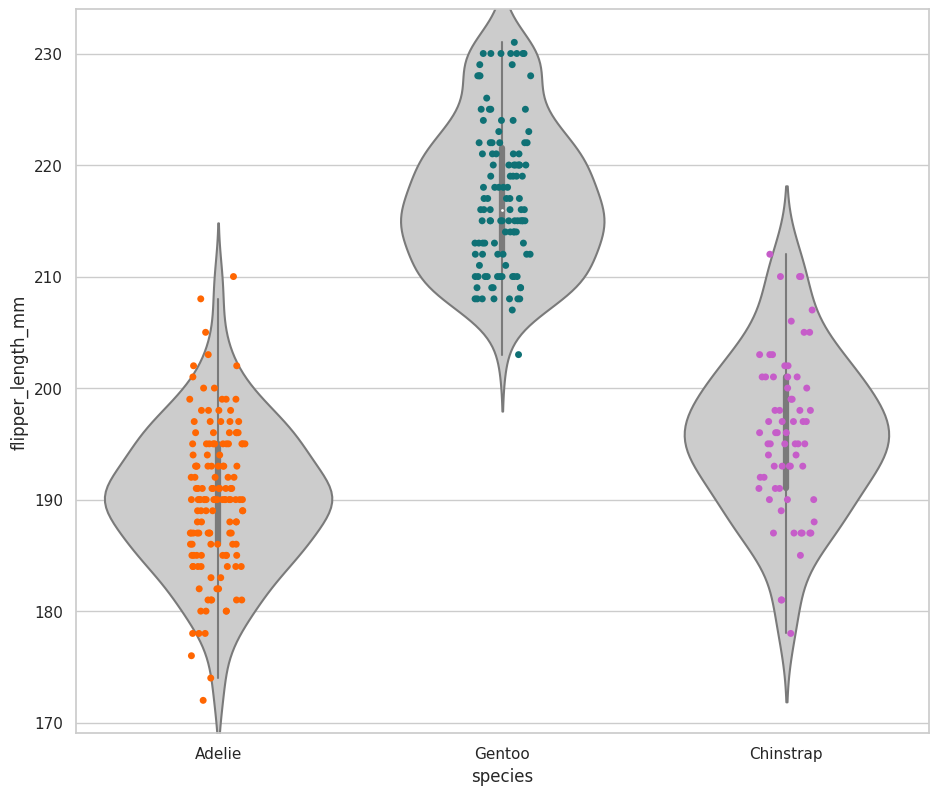

In [96]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='0.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

/tmp/ipykernel_117/3661350321.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

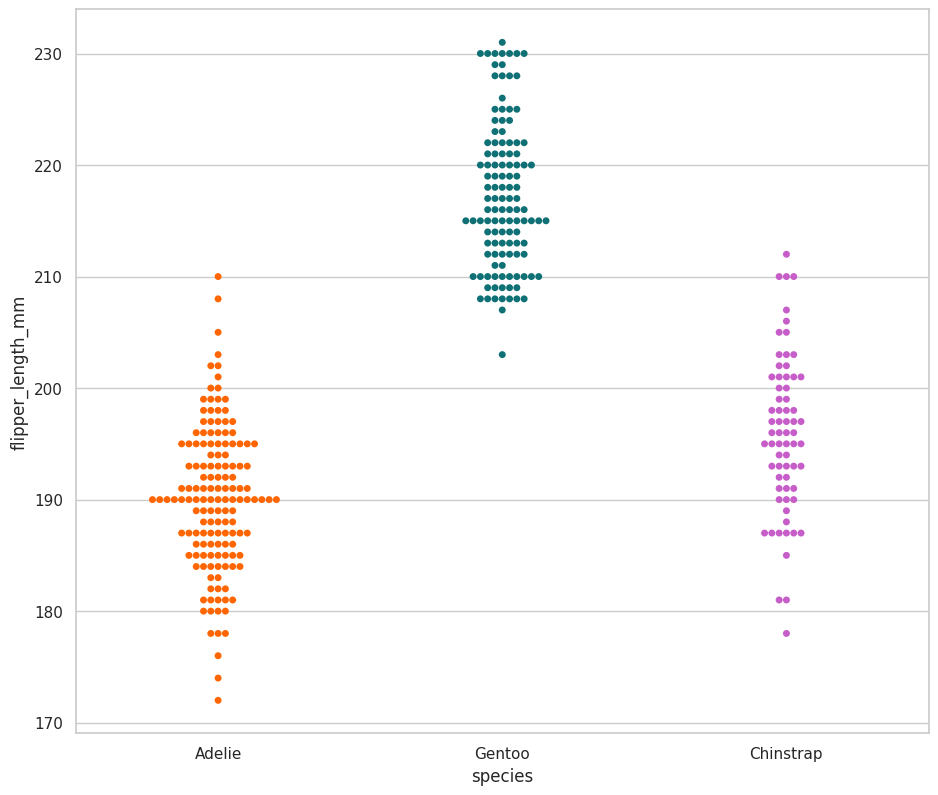

In [97]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

## Estableciendo relaciones.  Matrices de correlación

### ¿Existe una correlación lineal entre alguna de nuestras variables?

In [98]:
processed_penguins_df.corr()

/tmp/ipykernel_117/4090656914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


/tmp/ipykernel_117/2535690324.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<AxesSubplot: >

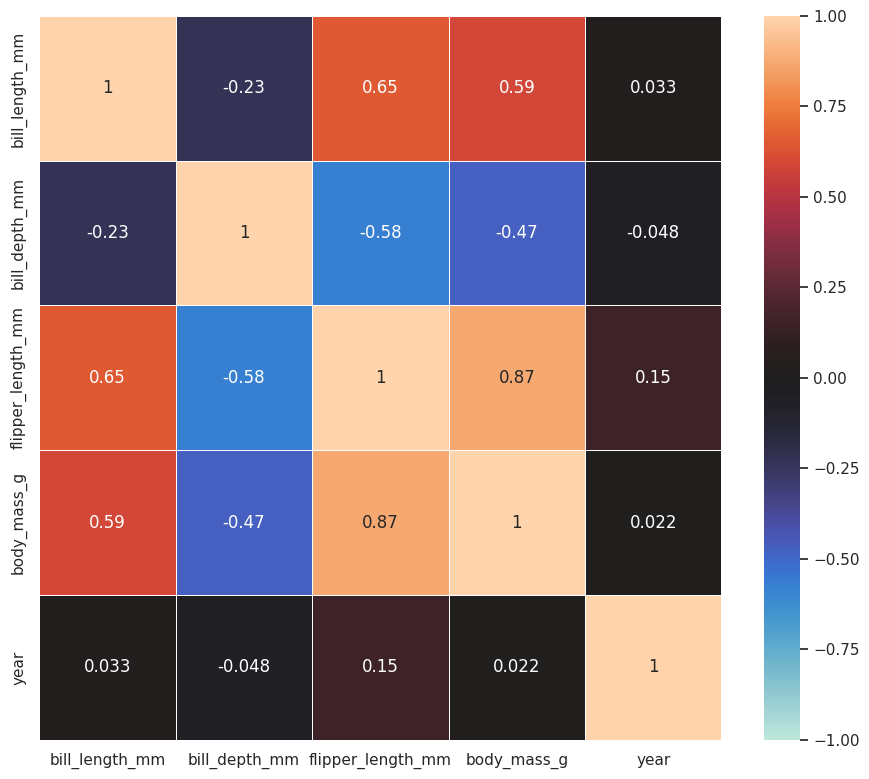

In [101]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

/tmp/ipykernel_117/4127411638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<AxesSubplot: >

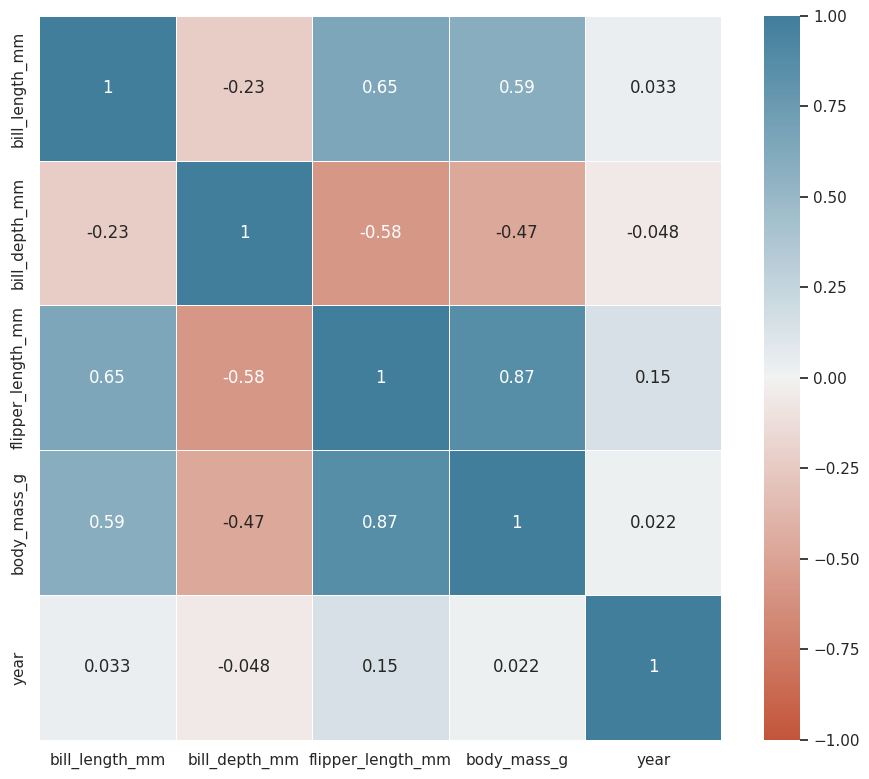

In [102]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

/tmp/ipykernel_117/3065477016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


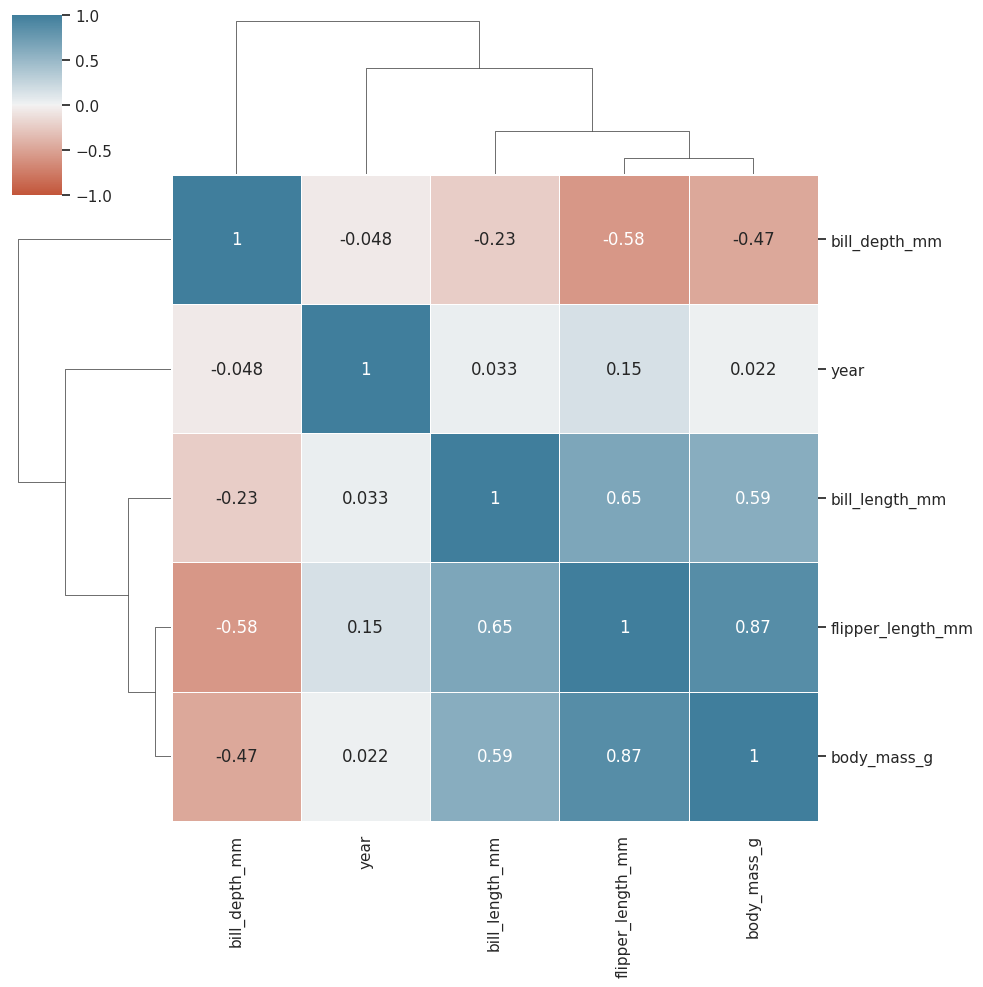

In [103]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

### ¿Cómo podría representar una variable categórica como numérica discreta?

In [105]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0, 1])
    )
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1


/tmp/ipykernel_117/3065477016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


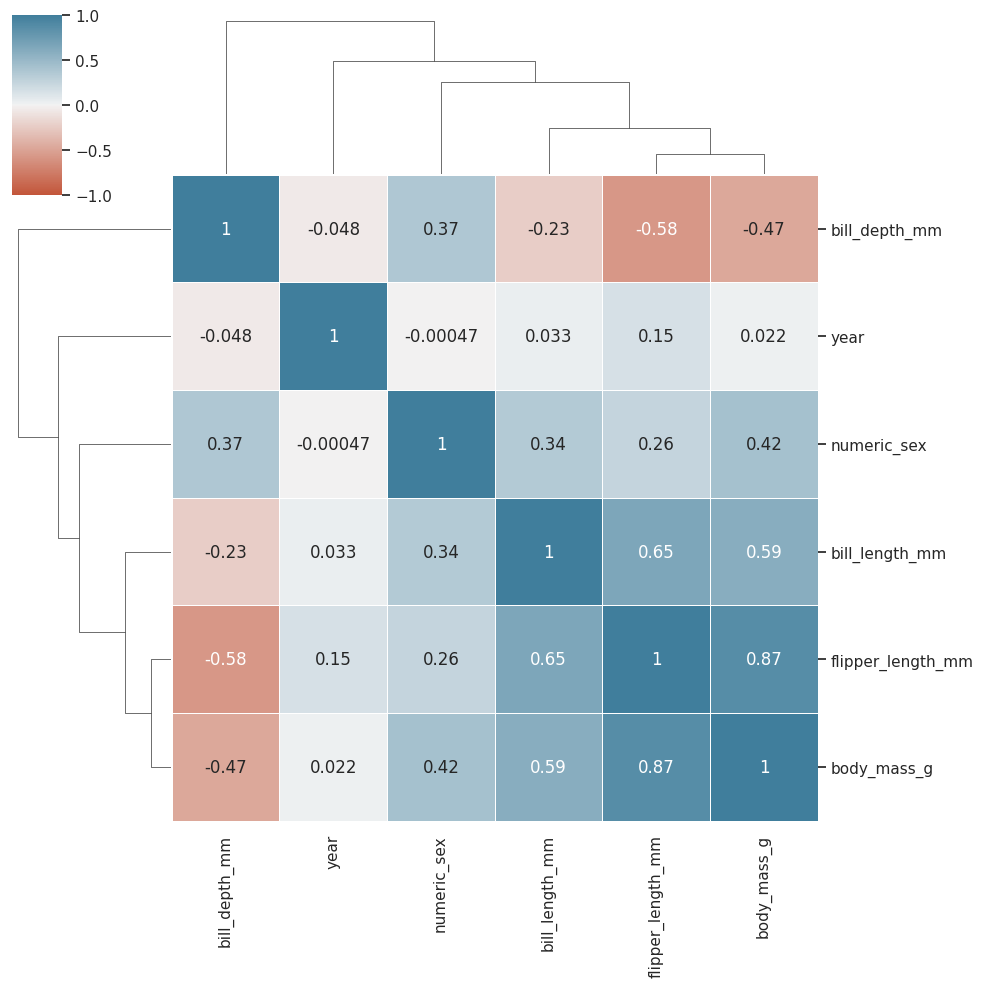

In [106]:
sns.clustermap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## ¿Cuáles son algunas limitantes de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[1.        , 0.00537207],
       [0.00537207, 1.        ]])

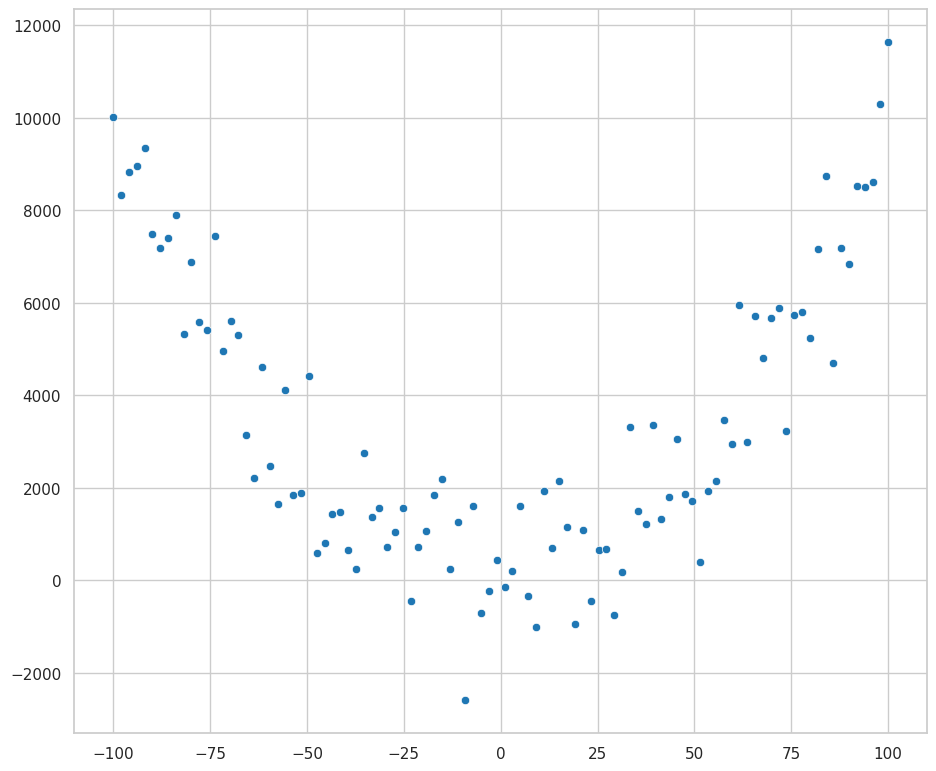

In [114]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x, y)

array([[1.        , 0.91656338],
       [0.91656338, 1.        ]])

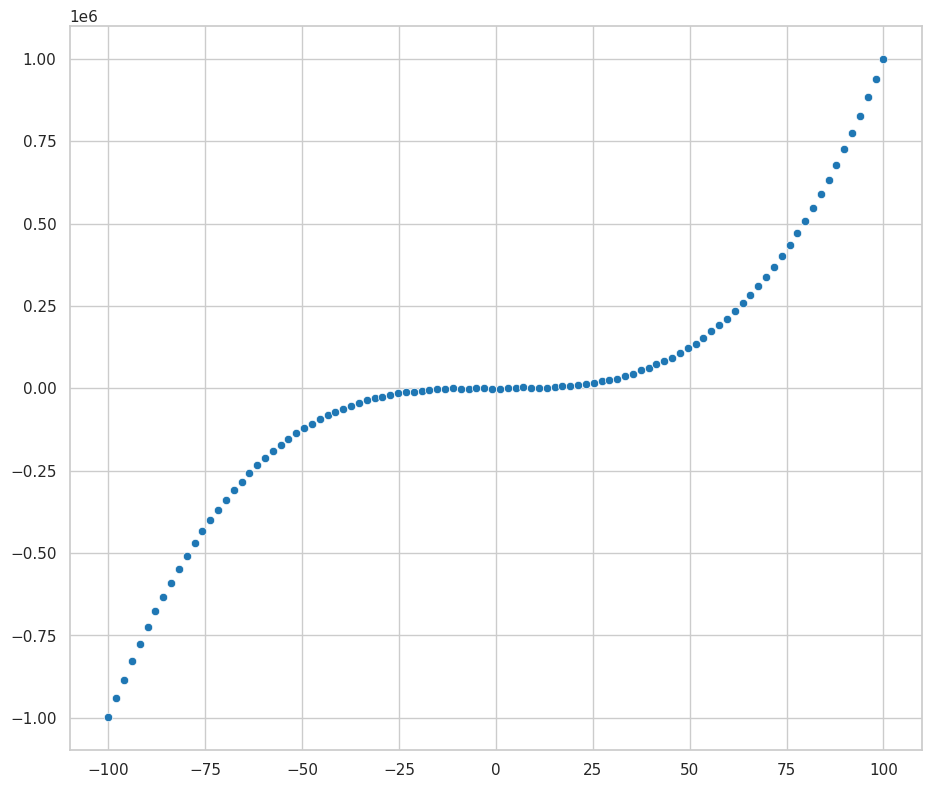

In [115]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x, y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

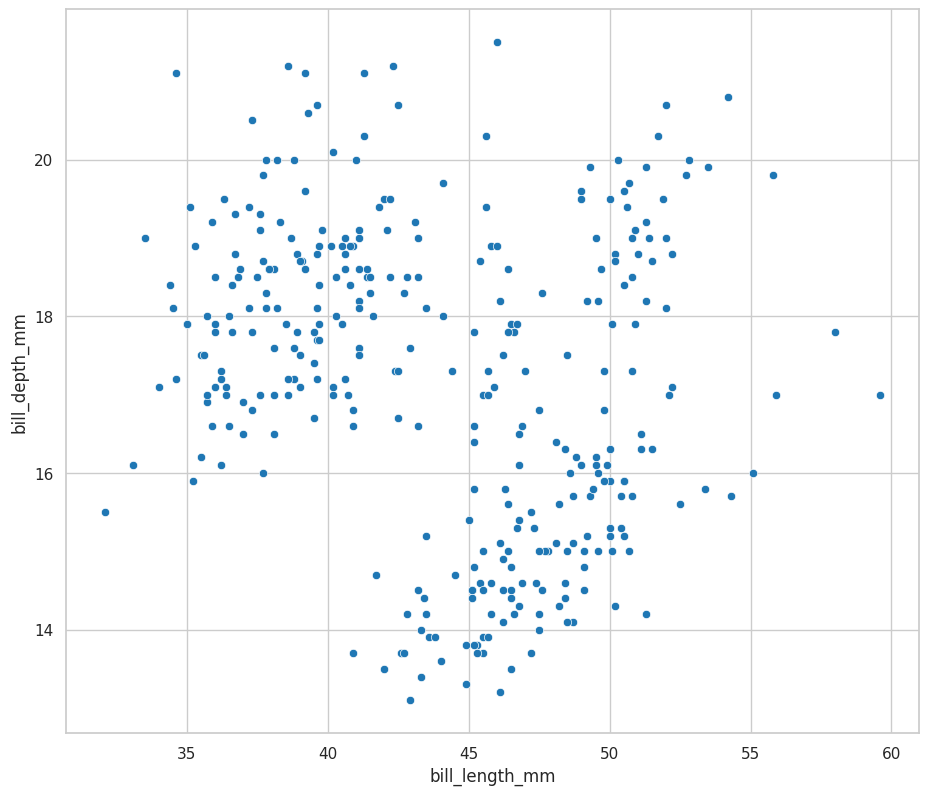

In [116]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


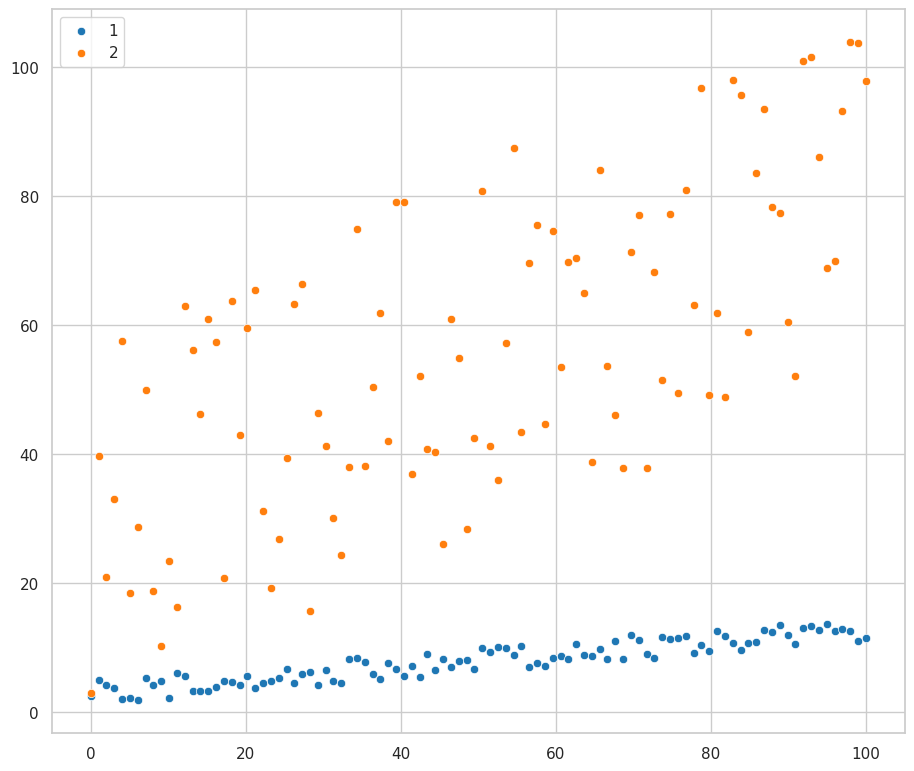

In [117]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af17ddda-f3fc-447b-b986-2283c8b594a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>